In [3]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [4]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [5]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [6]:
os.chdir("/mnt/lanlep2019/")

In [7]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.4MB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 1.5MB/s eta 0:00:011
    100% |████████████████████████████████| 1.7MB 870kB/s eta 0:00:011
    100% |████████████████████████████████| 419kB 3.3MB/s  eta 0:00:01
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
Successfully built future networkx
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [8]:
import lightgbm as lgb

In [9]:
import data
import config

In [10]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [11]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [12]:
traintest.num_dataset()

5

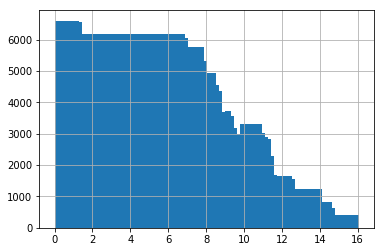

In [13]:
traintest.ydf.hist(bins=100);

In [14]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [15]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [16]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [17]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [18]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [19]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [20]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [21]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [22]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [23]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [24]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [25]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


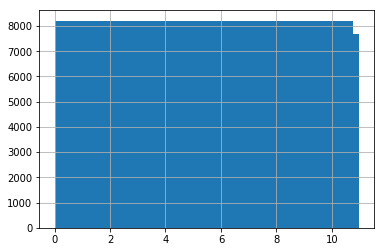

In [26]:
ydf.hist(bins=50);

In [27]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [28]:
from hyperopt import fmin, tpe, hp


In [29]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [37]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=None,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[None,None],
                    verbose=100, early_stopping_rounds=100)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [38]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'fair',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [39]:
best_mae=1e10

In [40]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,
          subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf,
         fair_c):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [41]:
space={
   'num_leaves': hp.uniform('num_leaves', 32,128 ),
    'reg_alpha':hp.loguniform('reg_alpha', np.log(0.01),np.log(10) ),
    'reg_lambda':hp.loguniform('reg_lambda', np.log(0.01),np.log(10) ),
    'max_depth':hp.uniform('max_depth',  3,10 ),
    'subsample':hp.uniform('subsample',  0.3,1 ),
    'colsample_bytree':hp.uniform('colsample_bytree',  0.3,1 ),
    'min_data_in_leaf':hp.loguniform('min_data_in_leaf', np.log(5),np.log(3000) ),
    'min_sum_hessian_in_leaf':hp.loguniform('min_sum_hessian_in_leaf', np.log(1e-3),np.log(3) ),
    'learning_rate':hp.loguniform('learning_rate', np.log(1e-3),np.log(0.01) ),
    'fair_c':hp.uniform('fair_c', 0.1,2 ),
}

In [42]:
def objective(args):
    print args
    return lgbcv(**args)



In [43]:
best = fmin(fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100)
print best

{'num_leaves': 96.32084062069328, 'reg_alpha': 6.8216703205291225, 'colsample_bytree': 0.7509751774259805, 'learning_rate': 0.002363749186559587, 'fair_c': 0.11518028873165014, 'subsample': 0.7717154721508777, 'reg_lambda': 0.01140927774512643, 'min_data_in_leaf': 672.2167295947822, 'max_depth': 4.374572754898678, 'min_sum_hessian_in_leaf': 0.5611608733234986}
valid quake                                          
1                                                    
(379874, 450)                                        
(379874,)                                            
(29520, 450)                                         
(29520,)                                             
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.55146	valid_1's l1: 1.74483   
[200]	training's l1: 1.32382	valid_1's l1: 1.57177   
[300]	training's l1: 1.21595	valid_1's l1: 1.47292   
[400]	training's l1: 1.15408	valid_1's l1: 1.40452   
[500]	training's l1: 1.11581	valid

[800]	training's l1: 1.06085	valid_1's l1: 1.24528   
Early stopping, best iteration is:                   
[781]	training's l1: 1.06299	valid_1's l1: 1.24512
quake                                                
5                                                    
(1.2451180764084029, 781)                            
valid quake                                          
6                                                    
(391376, 450)                                        
(391376,)                                            
(18018, 450)                                         
(18018,)                                             
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.56532	valid_1's l1: 1.78525   
[200]	training's l1: 1.33165	valid_1's l1: 1.58285   
[300]	training's l1: 1.21938	valid_1's l1: 1.50002   
[400]	training's l1: 1.15432	valid_1's l1: 1.45608   
[500]	training's l1: 1.11359	valid_1's l1: 1.42986   
[600]	training's l1: 1

[100]	training's l1: 1.57365	valid_1's l1: 1.58291   
[200]	training's l1: 1.34511	valid_1's l1: 1.31683   
[300]	training's l1: 1.2332	valid_1's l1: 1.19169    
[400]	training's l1: 1.16784	valid_1's l1: 1.12499   
[500]	training's l1: 1.12818	valid_1's l1: 1.08861   
[600]	training's l1: 1.10285	valid_1's l1: 1.06651   
[700]	training's l1: 1.08558	valid_1's l1: 1.05256   
[800]	training's l1: 1.07321	valid_1's l1: 1.04337   
[900]	training's l1: 1.06403	valid_1's l1: 1.03759   
[1000]	training's l1: 1.05672	valid_1's l1: 1.03329  
[1100]	training's l1: 1.05072	valid_1's l1: 1.03027  
[1200]	training's l1: 1.04534	valid_1's l1: 1.0293   
[1300]	training's l1: 1.04045	valid_1's l1: 1.02811  
[1400]	training's l1: 1.03606	valid_1's l1: 1.02784  
[1500]	training's l1: 1.03206	valid_1's l1: 1.02797  
Early stopping, best iteration is:                   
[1430]	training's l1: 1.03482	valid_1's l1: 1.02776
quake                                                
11                            

[1800]	training's l1: 0.887708	valid_1's l1: 1.212                          
[1900]	training's l1: 0.878987	valid_1's l1: 1.2084                         
[2000]	training's l1: 0.870589	valid_1's l1: 1.20513                        
[2100]	training's l1: 0.862219	valid_1's l1: 1.20258                        
[2200]	training's l1: 0.853873	valid_1's l1: 1.20053                        
[2300]	training's l1: 0.846215	valid_1's l1: 1.19871                        
[2400]	training's l1: 0.83911	valid_1's l1: 1.19754                         
[2500]	training's l1: 0.831969	valid_1's l1: 1.19724                        
Early stopping, best iteration is:                                          
[2451]	training's l1: 0.835638	valid_1's l1: 1.1969
quake                                                                       
1                                                                           
(1.1969046657625166, 2451)                                                  
valid quake             

[1400]	training's l1: 0.938833	valid_1's l1: 1.15169                        
[1500]	training's l1: 0.926765	valid_1's l1: 1.1469                         
[1600]	training's l1: 0.915893	valid_1's l1: 1.14316                        
[1700]	training's l1: 0.90597	valid_1's l1: 1.14069                         
[1800]	training's l1: 0.896389	valid_1's l1: 1.13805                        
[1900]	training's l1: 0.88757	valid_1's l1: 1.13574                         
[2000]	training's l1: 0.879181	valid_1's l1: 1.13459                        
[2100]	training's l1: 0.870646	valid_1's l1: 1.1334                         
[2200]	training's l1: 0.862813	valid_1's l1: 1.13269                        
[2300]	training's l1: 0.855133	valid_1's l1: 1.13257                        
[2400]	training's l1: 0.847722	valid_1's l1: 1.13198                        
Early stopping, best iteration is:                                          
[2350]	training's l1: 0.85132	valid_1's l1: 1.13176
quake                   

quake                                                                       
7                                                                           
(1.3935865700744834, 2325)                                                  
valid quake                                                                 
8                                                                           
(389202, 450)                                                               
(389202,)                                                                   
(20192, 450)                                                                
(20192,)                                                                    
Training until validation scores don't improve for 100 rounds.              
[100]	training's l1: 2.08851	valid_1's l1: 2.05752                          
[200]	training's l1: 1.7353	valid_1's l1: 1.73594                           
[300]	training's l1: 1.51286	valid_1's l1: 1.55494                          

Training until validation scores don't improve for 100 rounds.              
[100]	training's l1: 2.09305	valid_1's l1: 2.10597                          
[200]	training's l1: 1.74297	valid_1's l1: 1.75893                          
[300]	training's l1: 1.52223	valid_1's l1: 1.53961                          
[400]	training's l1: 1.37197	valid_1's l1: 1.39163                          
[500]	training's l1: 1.2648	valid_1's l1: 1.29096                           
[600]	training's l1: 1.18588	valid_1's l1: 1.22298                          
[700]	training's l1: 1.12616	valid_1's l1: 1.17666                          
[800]	training's l1: 1.07998	valid_1's l1: 1.14416                          
[900]	training's l1: 1.04392	valid_1's l1: 1.12065                          
[1000]	training's l1: 1.01565	valid_1's l1: 1.1035                          
[1100]	training's l1: 0.992683	valid_1's l1: 1.09085                        
[1200]	training's l1: 0.973166	valid_1's l1: 1.08184                        

[1900]	training's l1: 0.858165	valid_1's l1: 1.46345                        
[2000]	training's l1: 0.849939	valid_1's l1: 1.46267                        
[2100]	training's l1: 0.841927	valid_1's l1: 1.46129                        
[2200]	training's l1: 0.834432	valid_1's l1: 1.4611                         
Early stopping, best iteration is:                                          
[2190]	training's l1: 0.835144	valid_1's l1: 1.46074
quake                                                                       
14                                                                          
(1.4607365763896727, 2190)                                                  
valid quake                                                                 
15                                                                          
(385215, 450)                                                               
(385215,)                                                                   
(24179, 450)           

[2400]	training's l1: 0.981906	valid_1's l1: 1.30948                         
[2500]	training's l1: 0.979204	valid_1's l1: 1.30918                         
Early stopping, best iteration is:                                           
[2461]	training's l1: 0.980401	valid_1's l1: 1.30892
quake                                                                        
2                                                                            
(1.3089150203194497, 2461)                                                   
valid quake                                                                  
3                                                                            
(386763, 450)                                                                
(386763,)                                                                    
(22631, 450)                                                                 
(22631,)                                                                     
Training un

[1900]	training's l1: 1.00619	valid_1's l1: 1.35652                          
[2000]	training's l1: 1.00351	valid_1's l1: 1.35627                          
[2100]	training's l1: 1.00073	valid_1's l1: 1.35591                          
[2200]	training's l1: 0.997822	valid_1's l1: 1.35582                         
[2300]	training's l1: 0.994899	valid_1's l1: 1.35601                         
Early stopping, best iteration is:                                           
[2245]	training's l1: 0.996421	valid_1's l1: 1.35559
quake                                                                        
6                                                                            
(1.355593314493328, 2245)                                                    
valid quake                                                                  
7                                                                            
(368154, 450)                                                                
(368154,)  

[1600]	training's l1: 1.02975	valid_1's l1: 1.02471                          
[1700]	training's l1: 1.02602	valid_1's l1: 1.0237                           
[1800]	training's l1: 1.02258	valid_1's l1: 1.02274                          
[1900]	training's l1: 1.01938	valid_1's l1: 1.02207                          
[2000]	training's l1: 1.0164	valid_1's l1: 1.02146                           
[2100]	training's l1: 1.01352	valid_1's l1: 1.0209                           
[2200]	training's l1: 1.01081	valid_1's l1: 1.02054                          
[2300]	training's l1: 1.00811	valid_1's l1: 1.02035                          
Early stopping, best iteration is:                                           
[2280]	training's l1: 1.00858	valid_1's l1: 1.02028
quake                                                                        
10                                                                           
(1.0202754982520954, 2280)                                                   
valid quake 

[1300]	training's l1: 1.00856	valid_1's l1: 1.45255                          
[1400]	training's l1: 1.00314	valid_1's l1: 1.4512                           
[1500]	training's l1: 0.998254	valid_1's l1: 1.44961                         
[1600]	training's l1: 0.993838	valid_1's l1: 1.44894                         
[1700]	training's l1: 0.990301	valid_1's l1: 1.4491                          
Early stopping, best iteration is:                                           
[1648]	training's l1: 0.992051	valid_1's l1: 1.44862
quake                                                                        
14                                                                           
(1.448622978003694, 1648)                                                    
valid quake                                                                  
15                                                                           
(385215, 450)                                                                
(385215,)  

[1500]	training's l1: 0.994192	valid_1's l1: 1.36671                         
[1600]	training's l1: 0.986567	valid_1's l1: 1.36133                         
[1700]	training's l1: 0.979737	valid_1's l1: 1.35669                         
[1800]	training's l1: 0.973336	valid_1's l1: 1.35309                         
[1900]	training's l1: 0.967513	valid_1's l1: 1.35048                         
[2000]	training's l1: 0.961888	valid_1's l1: 1.34812                         
[2100]	training's l1: 0.956255	valid_1's l1: 1.34623                         
[2200]	training's l1: 0.950805	valid_1's l1: 1.34437                         
[2300]	training's l1: 0.945612	valid_1's l1: 1.34272                         
[2400]	training's l1: 0.940713	valid_1's l1: 1.34135                         
[2500]	training's l1: 0.936618	valid_1's l1: 1.33984                         
[2600]	training's l1: 0.932599	valid_1's l1: 1.33856                         
[2700]	training's l1: 0.928923	valid_1's l1: 1.33755            

[600]	training's l1: 1.23039	valid_1's l1: 1.34919                             
[700]	training's l1: 1.17346	valid_1's l1: 1.31661                             
[800]	training's l1: 1.1309	valid_1's l1: 1.2959                               
[900]	training's l1: 1.0987	valid_1's l1: 1.28266                              
[1000]	training's l1: 1.07404	valid_1's l1: 1.27419                            
[1100]	training's l1: 1.05482	valid_1's l1: 1.26968                            
[1200]	training's l1: 1.03917	valid_1's l1: 1.26698                            
[1300]	training's l1: 1.02626	valid_1's l1: 1.26601                            
Early stopping, best iteration is:                                             
[1278]	training's l1: 1.02891	valid_1's l1: 1.26594
quake                                                                          
5                                                                              
(1.265937346275923, 1278)                                           

[100]	training's l1: 2.12872	valid_1's l1: 2.08999                             
[200]	training's l1: 1.78391	valid_1's l1: 1.76273                             
[300]	training's l1: 1.56274	valid_1's l1: 1.57415                             
[400]	training's l1: 1.41263	valid_1's l1: 1.45976                             
[500]	training's l1: 1.30625	valid_1's l1: 1.38531                             
[600]	training's l1: 1.22869	valid_1's l1: 1.33752                             
[700]	training's l1: 1.17177	valid_1's l1: 1.30972                             
[800]	training's l1: 1.12913	valid_1's l1: 1.29547                             
[900]	training's l1: 1.09677	valid_1's l1: 1.28894                             
[1000]	training's l1: 1.07189	valid_1's l1: 1.2871                             
Early stopping, best iteration is:                                             
[989]	training's l1: 1.07432	valid_1's l1: 1.28691
quake                                                                

[200]	training's l1: 1.79316	valid_1's l1: 1.76442                             
[300]	training's l1: 1.57398	valid_1's l1: 1.53796                             
[400]	training's l1: 1.42531	valid_1's l1: 1.38673                             
[500]	training's l1: 1.31986	valid_1's l1: 1.2827                              
[600]	training's l1: 1.24271	valid_1's l1: 1.21118                             
[700]	training's l1: 1.18616	valid_1's l1: 1.16092                             
[800]	training's l1: 1.1437	valid_1's l1: 1.12529                              
[900]	training's l1: 1.11156	valid_1's l1: 1.10035                             
[1000]	training's l1: 1.08683	valid_1's l1: 1.08226                            
[1100]	training's l1: 1.06737	valid_1's l1: 1.06947                            
[1200]	training's l1: 1.05174	valid_1's l1: 1.05988                            
[1300]	training's l1: 1.03875	valid_1's l1: 1.05289                            
[1400]	training's l1: 1.02782	valid_1's 

[1600]	training's l1: 0.97564	valid_1's l1: 1.46897                            
[1700]	training's l1: 0.96863	valid_1's l1: 1.4664                             
[1800]	training's l1: 0.962194	valid_1's l1: 1.46433                           
[1900]	training's l1: 0.956003	valid_1's l1: 1.46251                           
[2000]	training's l1: 0.950245	valid_1's l1: 1.46097                           
[2100]	training's l1: 0.944669	valid_1's l1: 1.46001                           
[2200]	training's l1: 0.939468	valid_1's l1: 1.45912                           
[2300]	training's l1: 0.93462	valid_1's l1: 1.45906                            
Early stopping, best iteration is:                                             
[2248]	training's l1: 0.937107	valid_1's l1: 1.45891
quake                                                                          
14                                                                             
(1.458912970820168, 2248)                                          

(0.8315264529261571, 330)                                                       
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)                                                                    
(32480,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.27209	valid_1's l1: 1.28178                              
[200]	training's l1: 1.09871	valid_1's l1: 1.13908                              
[300]	training's l1: 1.04014	valid_1's l1: 1.09982                              
[400]	training's l1: 1.01305	valid_1's l1: 1.08714                              
[500]	training's l1: 0.99739

[200]	training's l1: 1.10705	valid_1's l1: 0.967228                             
[300]	training's l1: 1.04962	valid_1's l1: 0.926702                             
[400]	training's l1: 1.02147	valid_1's l1: 0.910515                             
[500]	training's l1: 1.00387	valid_1's l1: 0.903028                             
[600]	training's l1: 0.989961	valid_1's l1: 0.901776                            
[700]	training's l1: 0.979606	valid_1's l1: 0.901137                            
[800]	training's l1: 0.971716	valid_1's l1: 0.900708                            
[900]	training's l1: 0.963852	valid_1's l1: 0.900109                            
[1000]	training's l1: 0.957027	valid_1's l1: 0.899768                           
[1100]	training's l1: 0.949017	valid_1's l1: 0.89924                            
[1200]	training's l1: 0.941806	valid_1's l1: 0.898625                           
[1300]	training's l1: 0.934431	valid_1's l1: 0.898321                           
Early stopping, best iterati

[500]	training's l1: 0.964243	valid_1's l1: 1.45972                             
[600]	training's l1: 0.949982	valid_1's l1: 1.45569                             
[700]	training's l1: 0.939834	valid_1's l1: 1.45434                             
[800]	training's l1: 0.931582	valid_1's l1: 1.45426                             
Early stopping, best iteration is:                                              
[738]	training's l1: 0.936398	valid_1's l1: 1.45365
quake                                                                           
14                                                                              
(1.4536478613300576, 738)                                                       
valid quake                                                                     
15                                                                              
(385215, 450)                                                                   
(385215,)                                                

[1900]	training's l1: 0.823055	valid_1's l1: 1.33958                           
[2000]	training's l1: 0.813426	valid_1's l1: 1.33573                           
[2100]	training's l1: 0.804568	valid_1's l1: 1.33222                           
[2200]	training's l1: 0.796398	valid_1's l1: 1.32903                           
[2300]	training's l1: 0.788542	valid_1's l1: 1.32657                           
[2400]	training's l1: 0.780969	valid_1's l1: 1.32509                           
[2500]	training's l1: 0.773194	valid_1's l1: 1.3234                            
[2600]	training's l1: 0.765549	valid_1's l1: 1.32176                           
[2700]	training's l1: 0.757761	valid_1's l1: 1.32061                           
[2800]	training's l1: 0.750138	valid_1's l1: 1.3198                            
[2900]	training's l1: 0.742667	valid_1's l1: 1.31962                           
Early stopping, best iteration is:                                             
[2830]	training's l1: 0.747964	valid_1's

quake                                                                          
5                                                                              
(1.2816751468407361, 1488)                                                     
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 2.15409	valid_1's l1: 2.29077                             
[200]	training's l1: 1.80988	valid_1's l1: 2.02131                             
[300]	training's l1: 1.58223	valid_1's l

[800]	training's l1: 1.08038	valid_1's l1: 1.30658                             
[900]	training's l1: 1.03533	valid_1's l1: 1.29294                             
[1000]	training's l1: 0.998683	valid_1's l1: 1.28563                           
[1100]	training's l1: 0.968615	valid_1's l1: 1.28106                           
[1200]	training's l1: 0.942973	valid_1's l1: 1.279                             
[1300]	training's l1: 0.921491	valid_1's l1: 1.27921                           
Early stopping, best iteration is:                                             
[1213]	training's l1: 0.939988	valid_1's l1: 1.27861
quake                                                                          
8                                                                              
(1.2786057922531058, 1213)                                                     
valid quake                                                                    
9                                                                  

[500]	training's l1: 1.30694	valid_1's l1: 1.36175                             
[600]	training's l1: 1.21669	valid_1's l1: 1.28191                             
[700]	training's l1: 1.1459	valid_1's l1: 1.22469                              
[800]	training's l1: 1.08951	valid_1's l1: 1.18239                             
[900]	training's l1: 1.04401	valid_1's l1: 1.15101                             
[1000]	training's l1: 1.00649	valid_1's l1: 1.12707                            
[1100]	training's l1: 0.975917	valid_1's l1: 1.10967                           
[1200]	training's l1: 0.950766	valid_1's l1: 1.097                             
[1300]	training's l1: 0.929071	valid_1's l1: 1.08721                           
[1400]	training's l1: 0.910285	valid_1's l1: 1.0794                            
[1500]	training's l1: 0.893663	valid_1's l1: 1.07271                           
[1600]	training's l1: 0.879085	valid_1's l1: 1.06803                           
[1700]	training's l1: 0.865865	valid_1's

[1000]	training's l1: 0.975893	valid_1's l1: 1.53616                           
[1100]	training's l1: 0.945572	valid_1's l1: 1.52146                           
[1200]	training's l1: 0.920138	valid_1's l1: 1.51021                           
[1300]	training's l1: 0.898708	valid_1's l1: 1.50147                           
[1400]	training's l1: 0.879844	valid_1's l1: 1.49404                           
[1500]	training's l1: 0.863518	valid_1's l1: 1.48792                           
[1600]	training's l1: 0.849098	valid_1's l1: 1.48331                           
[1700]	training's l1: 0.835768	valid_1's l1: 1.47957                           
[1800]	training's l1: 0.823889	valid_1's l1: 1.47675                           
[1900]	training's l1: 0.812994	valid_1's l1: 1.47448                           
[2000]	training's l1: 0.802987	valid_1's l1: 1.47255                           
[2100]	training's l1: 0.793388	valid_1's l1: 1.47088                           
[2200]	training's l1: 0.784543	valid_1's

[3600]	training's l1: 1.06485	valid_1's l1: 1.18784                             
[3700]	training's l1: 1.06342	valid_1's l1: 1.18713                             
[3800]	training's l1: 1.06202	valid_1's l1: 1.18641                             
[3900]	training's l1: 1.06067	valid_1's l1: 1.18578                             
[4000]	training's l1: 1.05934	valid_1's l1: 1.18532                             
[4100]	training's l1: 1.05803	valid_1's l1: 1.18485                             
[4200]	training's l1: 1.05677	valid_1's l1: 1.18465                             
[4300]	training's l1: 1.0556	valid_1's l1: 1.18444                              
[4400]	training's l1: 1.0544	valid_1's l1: 1.18441                              
[4500]	training's l1: 1.05323	valid_1's l1: 1.18431                             
[4600]	training's l1: 1.05207	valid_1's l1: 1.18422                             
[4700]	training's l1: 1.05091	valid_1's l1: 1.18416                             
[4800]	training's l1: 1.0497

quake                                                                           
3                                                                               
(0.8247518529289039, 1950)                                                      
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)                                                                    
(32480,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 2.32982	valid_1's l1: 2.31261                              
[200]	training's l1: 2.04899	valid_1's l1: 2.02207                              
[300]	training's l1: 1.84551

[2000]	training's l1: 1.10412	valid_1's l1: 1.39446                             
[2100]	training's l1: 1.09883	valid_1's l1: 1.39198                             
[2200]	training's l1: 1.09416	valid_1's l1: 1.39009                             
[2300]	training's l1: 1.09005	valid_1's l1: 1.38865                             
[2400]	training's l1: 1.08639	valid_1's l1: 1.3874                              
[2500]	training's l1: 1.0831	valid_1's l1: 1.38689                              
[2600]	training's l1: 1.08018	valid_1's l1: 1.3863                              
[2700]	training's l1: 1.07757	valid_1's l1: 1.38569                             
[2800]	training's l1: 1.07518	valid_1's l1: 1.38526                             
[2900]	training's l1: 1.07305	valid_1's l1: 1.3849                              
[3000]	training's l1: 1.07103	valid_1's l1: 1.38433                             
[3100]	training's l1: 1.06915	valid_1's l1: 1.38366                             
[3200]	training's l1: 1.0674

[1100]	training's l1: 1.22216	valid_1's l1: 1.34105                             
[1200]	training's l1: 1.19689	valid_1's l1: 1.33089                             
[1300]	training's l1: 1.17644	valid_1's l1: 1.32463                             
[1400]	training's l1: 1.15958	valid_1's l1: 1.32152                             
[1500]	training's l1: 1.14562	valid_1's l1: 1.3197                              
[1600]	training's l1: 1.13398	valid_1's l1: 1.31883                             
[1700]	training's l1: 1.1242	valid_1's l1: 1.31837                              
Early stopping, best iteration is:                                              
[1699]	training's l1: 1.12429	valid_1's l1: 1.31835
quake                                                                           
8                                                                               
(1.3183459824558426, 1699)                                                      
valid quake                                              

[3000]	training's l1: 1.08816	valid_1's l1: 1.01314                             
[3100]	training's l1: 1.08622	valid_1's l1: 1.01203                             
[3200]	training's l1: 1.08444	valid_1's l1: 1.01095                             
[3300]	training's l1: 1.08281	valid_1's l1: 1.01004                             
[3400]	training's l1: 1.08121	valid_1's l1: 1.00913                             
[3500]	training's l1: 1.07975	valid_1's l1: 1.00845                             
[3600]	training's l1: 1.07829	valid_1's l1: 1.00779                             
[3700]	training's l1: 1.0769	valid_1's l1: 1.0072                               
[3800]	training's l1: 1.07554	valid_1's l1: 1.00657                             
[3900]	training's l1: 1.07425	valid_1's l1: 1.00615                             
[4000]	training's l1: 1.073	valid_1's l1: 1.00576                               
[4100]	training's l1: 1.0717	valid_1's l1: 1.00559                              
[4200]	training's l1: 1.0705

[2200]	training's l1: 1.11479	valid_1's l1: 0.904533                            
[2300]	training's l1: 1.11054	valid_1's l1: 0.904574                            
Early stopping, best iteration is:                                              
[2275]	training's l1: 1.1116	valid_1's l1: 0.904477
quake                                                                           
12                                                                              
(0.9044768640231854, 2275)                                                      
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)                                                                    
(21885,)                                                 

[3700]	training's l1: 1.03964	valid_1's l1: 1.46848                             
[3800]	training's l1: 1.03813	valid_1's l1: 1.468                               
[3900]	training's l1: 1.03671	valid_1's l1: 1.46764                             
[4000]	training's l1: 1.03539	valid_1's l1: 1.46765                             
[4100]	training's l1: 1.03405	valid_1's l1: 1.4676                              
[4200]	training's l1: 1.03281	valid_1's l1: 1.46741                             
[4300]	training's l1: 1.03166	valid_1's l1: 1.46728                             
[4400]	training's l1: 1.03044	valid_1's l1: 1.46714                             
[4500]	training's l1: 1.02926	valid_1's l1: 1.467                               
[4600]	training's l1: 1.02807	valid_1's l1: 1.46692                             
[4700]	training's l1: 1.027	valid_1's l1: 1.46689                               
[4800]	training's l1: 1.0259	valid_1's l1: 1.46682                              
[4900]	training's l1: 1.0248

[300]	training's l1: 1.27845	valid_1's l1: 1.62505                              
[400]	training's l1: 1.17	valid_1's l1: 1.54041                                 
[500]	training's l1: 1.10118	valid_1's l1: 1.48315                              
[600]	training's l1: 1.05594	valid_1's l1: 1.44182                              
[700]	training's l1: 1.02477	valid_1's l1: 1.41117                              
[800]	training's l1: 1.00242	valid_1's l1: 1.38915                              
[900]	training's l1: 0.985701	valid_1's l1: 1.37315                             
[1000]	training's l1: 0.972616	valid_1's l1: 1.36134                            
[1100]	training's l1: 0.961763	valid_1's l1: 1.35357                            
[1200]	training's l1: 0.95288	valid_1's l1: 1.34713                             
[1300]	training's l1: 0.945646	valid_1's l1: 1.34216                            
[1400]	training's l1: 0.938943	valid_1's l1: 1.33874                            
[1500]	training's l1: 0.9322

(1.2528943839017956, 898)                                                       
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)                                                                    
(18018,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.82228	valid_1's l1: 2.02194                              
[200]	training's l1: 1.47555	valid_1's l1: 1.74138                              
[300]	training's l1: 1.29257	valid_1's l1: 1.60014                              
[400]	training's l1: 1.18256	valid_1's l1: 1.51856                              
[500]	training's l1: 1.11332

[900]	training's l1: 1.014	valid_1's l1: 0.907863                               
[1000]	training's l1: 1.0007	valid_1's l1: 0.902307                             
[1100]	training's l1: 0.989496	valid_1's l1: 0.899179                           
[1200]	training's l1: 0.979982	valid_1's l1: 0.896901                           
[1300]	training's l1: 0.971551	valid_1's l1: 0.895588                           
[1400]	training's l1: 0.96416	valid_1's l1: 0.894575                            
[1500]	training's l1: 0.957019	valid_1's l1: 0.894083                           
[1600]	training's l1: 0.949695	valid_1's l1: 0.894536                           
Early stopping, best iteration is:                                              
[1513]	training's l1: 0.956116	valid_1's l1: 0.894012
quake                                                                           
9                                                                               
(0.8940123968423603, 1513)                             

quake                                                                           
12                                                                              
(0.9310584437051919, 900)                                                       
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)                                                                    
(21885,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.8261	valid_1's l1: 1.63265                               
[200]	training's l1: 1.48036	valid_1's l1: 1.3279                               
[300]	training's l1: 1.29733

[1600]	training's l1: 0.990617	valid_1's l1: 1.19581                            
[1700]	training's l1: 0.985687	valid_1's l1: 1.19456                            
[1800]	training's l1: 0.981351	valid_1's l1: 1.19344                            
[1900]	training's l1: 0.977543	valid_1's l1: 1.19323                            
[2000]	training's l1: 0.973686	valid_1's l1: 1.19263                            
[2100]	training's l1: 0.970707	valid_1's l1: 1.19225                            
[2200]	training's l1: 0.967511	valid_1's l1: 1.19226                            
[2300]	training's l1: 0.964361	valid_1's l1: 1.19202                            
[2400]	training's l1: 0.961639	valid_1's l1: 1.1919                             
[2500]	training's l1: 0.95883	valid_1's l1: 1.19168                             
[2600]	training's l1: 0.956006	valid_1's l1: 1.19142                            
[2700]	training's l1: 0.953094	valid_1's l1: 1.19105                            
[2800]	training's l1: 0.9499

[2000]	training's l1: 0.983812	valid_1's l1: 1.08714                            
[2100]	training's l1: 0.980372	valid_1's l1: 1.08716                            
Early stopping, best iteration is:                                              
[2009]	training's l1: 0.983459	valid_1's l1: 1.08704
quake                                                                           
4                                                                               
(1.0870414452411032, 2009)                                                      
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388820,)                                                                       
(20574, 450)                                                                    
(20574,)                                                

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.96231	valid_1's l1: 1.91787                              
[200]	training's l1: 1.59417	valid_1's l1: 1.58831                              
[300]	training's l1: 1.3881	valid_1's l1: 1.43026                               
[400]	training's l1: 1.26248	valid_1's l1: 1.34754                              
[500]	training's l1: 1.182	valid_1's l1: 1.30672                                
[600]	training's l1: 1.12902	valid_1's l1: 1.29018                              
[700]	training's l1: 1.09321	valid_1's l1: 1.28515                              
[800]	training's l1: 1.06841	valid_1's l1: 1.28586                              
Early stopping, best iteration is:                                              
[737]	training's l1: 1.08307	valid_1's l1: 1.28482
quake                                                                           
8                                                         

quake                                                                           
11                                                                              
(1.0263868583154152, 1530)                                                      
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.97436	valid_1's l1: 1.8557                               
[200]	training's l1: 1.61106	valid_1's l1: 1.42902                              
[300]	training's l1: 1.40612

{'num_leaves': 56.644303360395696, 'reg_alpha': 6.117752709001103, 'colsample_bytree': 0.5069520847258101, 'learning_rate': 0.003049074027860347, 'fair_c': 0.3153816821231395, 'subsample': 0.8834979924535664, 'reg_lambda': 1.1432589087509026, 'min_data_in_leaf': 1810.8819847148, 'max_depth': 8.44324095428714, 'min_sum_hessian_in_leaf': 0.18871007628036257}
valid quake                                                                     
1                                                                               
(379874, 450)                                                                   
(379874,)                                                                       
(29520, 450)                                                                    
(29520,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.4802	valid_1's l1: 1.73044                         

[800]	training's l1: 0.951719	valid_1's l1: 1.06878                             
[900]	training's l1: 0.93982	valid_1's l1: 1.06662                              
[1000]	training's l1: 0.929056	valid_1's l1: 1.06598                            
[1100]	training's l1: 0.918936	valid_1's l1: 1.06621                            
Early stopping, best iteration is:                                              
[1033]	training's l1: 0.925951	valid_1's l1: 1.06597
quake                                                                           
4                                                                               
(1.0659662857912964, 1033)                                                      
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388820,)                                               

(384759,)                                                                       
(24635, 450)                                                                    
(24635,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.50427	valid_1's l1: 1.40439                              
[200]	training's l1: 1.2425	valid_1's l1: 1.12418                               
[300]	training's l1: 1.12351	valid_1's l1: 1.0071                               
[400]	training's l1: 1.05892	valid_1's l1: 0.953957                             
[500]	training's l1: 1.01967	valid_1's l1: 0.928253                             
[600]	training's l1: 0.993015	valid_1's l1: 0.913344                            
[700]	training's l1: 0.973792	valid_1's l1: 0.905161                            
[800]	training's l1: 0.958787	valid_1's l1: 0.90024                             
[900]	training's l1: 0.94567

(0.9394420991570887, 634)                                                       
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)                                                                    
(21885,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.49344	valid_1's l1: 1.36008                              
[200]	training's l1: 1.23166	valid_1's l1: 1.17556                              
[300]	training's l1: 1.11346	valid_1's l1: 1.10529                              
[400]	training's l1: 1.04826	valid_1's l1: 1.07586                              
[500]	training's l1: 1.00902

[2400]	training's l1: 0.86705	valid_1's l1: 1.20049                              
[2500]	training's l1: 0.861524	valid_1's l1: 1.20015                             
[2600]	training's l1: 0.856004	valid_1's l1: 1.20012                             
[2700]	training's l1: 0.850873	valid_1's l1: 1.1997                              
[2800]	training's l1: 0.845815	valid_1's l1: 1.19936                             
[2900]	training's l1: 0.840813	valid_1's l1: 1.19918                             
[3000]	training's l1: 0.835963	valid_1's l1: 1.19931                             
Early stopping, best iteration is:                                               
[2962]	training's l1: 0.837806	valid_1's l1: 1.19914
quake                                                                            
1                                                                                
(1.199144395022739, 2962)                                                        
valid quake                                  

[1100]	training's l1: 0.986193	valid_1's l1: 1.12402                             
[1200]	training's l1: 0.972115	valid_1's l1: 1.1179                              
[1300]	training's l1: 0.960136	valid_1's l1: 1.1128                              
[1400]	training's l1: 0.9497	valid_1's l1: 1.10881                               
[1500]	training's l1: 0.940503	valid_1's l1: 1.10571                             
[1600]	training's l1: 0.93182	valid_1's l1: 1.10486                              
[1700]	training's l1: 0.923848	valid_1's l1: 1.10473                             
[1800]	training's l1: 0.916355	valid_1's l1: 1.10529                             
Early stopping, best iteration is:                                               
[1731]	training's l1: 0.921564	valid_1's l1: 1.10429
quake                                                                            
4                                                                                
(1.1042942712183597, 1731)                   

[2000]	training's l1: 0.869928	valid_1's l1: 1.39123                             
[2100]	training's l1: 0.863104	valid_1's l1: 1.39044                             
[2200]	training's l1: 0.856587	valid_1's l1: 1.3902                              
[2300]	training's l1: 0.850303	valid_1's l1: 1.38986                             
[2400]	training's l1: 0.844297	valid_1's l1: 1.38926                             
[2500]	training's l1: 0.838478	valid_1's l1: 1.38875                             
[2600]	training's l1: 0.832974	valid_1's l1: 1.3886                              
[2700]	training's l1: 0.827551	valid_1's l1: 1.38794                             
Early stopping, best iteration is:                                               
[2665]	training's l1: 0.829496	valid_1's l1: 1.38784
quake                                                                            
7                                                                                
(1.3878436057751853, 2665)                   

(381198, 450)                                                                    
(381198,)                                                                        
(28196, 450)                                                                     
(28196,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.91128	valid_1's l1: 1.93812                               
[200]	training's l1: 1.57677	valid_1's l1: 1.59382                               
[300]	training's l1: 1.38784	valid_1's l1: 1.39774                               
[400]	training's l1: 1.26785	valid_1's l1: 1.27824                               
[500]	training's l1: 1.18583	valid_1's l1: 1.20181                               
[600]	training's l1: 1.12775	valid_1's l1: 1.15146                               
[700]	training's l1: 1.08529	valid_1's l1: 1.11857                               
[800]	training's

[1500]	training's l1: 0.90775	valid_1's l1: 1.45481                              
[1600]	training's l1: 0.899267	valid_1's l1: 1.45281                             
[1700]	training's l1: 0.891219	valid_1's l1: 1.45149                             
[1800]	training's l1: 0.88369	valid_1's l1: 1.45063                              
[1900]	training's l1: 0.876683	valid_1's l1: 1.4501                              
[2000]	training's l1: 0.869701	valid_1's l1: 1.44956                             
[2100]	training's l1: 0.863134	valid_1's l1: 1.44941                             
Early stopping, best iteration is:                                               
[2021]	training's l1: 0.868316	valid_1's l1: 1.44928
quake                                                                            
14                                                                               
(1.4492798406392255, 2021)                                                       
valid quake                                  

[1000]	training's l1: 1.12172	valid_1's l1: 1.40869                              
[1100]	training's l1: 1.10331	valid_1's l1: 1.39097                              
[1200]	training's l1: 1.08883	valid_1's l1: 1.37641                              
[1300]	training's l1: 1.07736	valid_1's l1: 1.36437                              
[1400]	training's l1: 1.0682	valid_1's l1: 1.35479                               
[1500]	training's l1: 1.0606	valid_1's l1: 1.34726                               
[1600]	training's l1: 1.05435	valid_1's l1: 1.3411                               
[1700]	training's l1: 1.04895	valid_1's l1: 1.33569                              
[1800]	training's l1: 1.04421	valid_1's l1: 1.33142                              
[1900]	training's l1: 1.03987	valid_1's l1: 1.32774                              
[2000]	training's l1: 1.03598	valid_1's l1: 1.32503                              
[2100]	training's l1: 1.03248	valid_1's l1: 1.32254                              
[2200]	training'

[800]	training's l1: 1.19131	valid_1's l1: 1.29907                               
[900]	training's l1: 1.1595	valid_1's l1: 1.28299                                
[1000]	training's l1: 1.13501	valid_1's l1: 1.2721                               
[1100]	training's l1: 1.11615	valid_1's l1: 1.26548                              
[1200]	training's l1: 1.10131	valid_1's l1: 1.26095                              
[1300]	training's l1: 1.08949	valid_1's l1: 1.25841                              
[1400]	training's l1: 1.07997	valid_1's l1: 1.25685                              
[1500]	training's l1: 1.07203	valid_1's l1: 1.25635                              
[1600]	training's l1: 1.0653	valid_1's l1: 1.25692                               
Early stopping, best iteration is:                                               
[1540]	training's l1: 1.06924	valid_1's l1: 1.25631
quake                                                                            
5                                             

valid quake                                                                      
8                                                                                
(389202, 450)                                                                    
(389202,)                                                                        
(20192, 450)                                                                     
(20192,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 2.17551	valid_1's l1: 2.13454                               
[200]	training's l1: 1.84079	valid_1's l1: 1.81027                               
[300]	training's l1: 1.62174	valid_1's l1: 1.61851                               
[400]	training's l1: 1.47143	valid_1's l1: 1.49902                               
[500]	training's l1: 1.3648	valid_1's l1: 1.42072                                
[600]	training's

10                                                                               
(1.015386200834973, 3189)                                                        
valid quake                                                                      
11                                                                               
(381198, 450)                                                                    
(381198,)                                                                        
(28196, 450)                                                                     
(28196,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 2.18392	valid_1's l1: 2.17415                               
[200]	training's l1: 1.85301	valid_1's l1: 1.82296                               
[300]	training's l1: 1.63595	valid_1's l1: 1.58908                               
[400]	training's

(371633, 450)                                                                    
(371633,)                                                                        
(37761, 450)                                                                     
(37761,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 2.16076	valid_1's l1: 2.28084                               
[200]	training's l1: 1.81973	valid_1's l1: 2.03309                               
[300]	training's l1: 1.59917	valid_1's l1: 1.87832                               
[400]	training's l1: 1.44866	valid_1's l1: 1.77312                               
[500]	training's l1: 1.34298	valid_1's l1: 1.69672                               
[600]	training's l1: 1.26664	valid_1's l1: 1.64131                               
[700]	training's l1: 1.21031	valid_1's l1: 1.59945                               
[800]	training's

[1900]	training's l1: 0.88872	valid_1's l1: 1.19223                              
[2000]	training's l1: 0.881759	valid_1's l1: 1.19165                             
[2100]	training's l1: 0.875209	valid_1's l1: 1.1915                              
[2200]	training's l1: 0.868575	valid_1's l1: 1.19149                             
Early stopping, best iteration is:                                               
[2151]	training's l1: 0.871824	valid_1's l1: 1.19126
quake                                                                            
1                                                                                
(1.1912624835936072, 2151)                                                       
valid quake                                                                      
2                                                                                
(373099, 450)                                                                    
(373099,)                                    

(388820,)                                                                        
(20574, 450)                                                                     
(20574,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.95564	valid_1's l1: 1.97743                               
[200]	training's l1: 1.58216	valid_1's l1: 1.64772                               
[300]	training's l1: 1.36953	valid_1's l1: 1.46841                               
[400]	training's l1: 1.23686	valid_1's l1: 1.36909                               
[500]	training's l1: 1.1503	valid_1's l1: 1.31785                                
[600]	training's l1: 1.09184	valid_1's l1: 1.28975                               
[700]	training's l1: 1.05106	valid_1's l1: 1.27498                               
[800]	training's l1: 1.02134	valid_1's l1: 1.26755                               
[900]	training's

(1.2929949693245881, 774)                                                        
valid quake                                                                      
9                                                                                
(384759, 450)                                                                    
(384759,)                                                                        
(24635, 450)                                                                     
(24635,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.96924	valid_1's l1: 1.89399                               
[200]	training's l1: 1.60047	valid_1's l1: 1.46487                               
[300]	training's l1: 1.38904	valid_1's l1: 1.22856                               
[400]	training's l1: 1.2569	valid_1's l1: 1.09092                                
[500]	training's

(22560, 450)                                                                     
(22560,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.96723	valid_1's l1: 1.86923                               
[200]	training's l1: 1.59778	valid_1's l1: 1.44517                               
[300]	training's l1: 1.38615	valid_1's l1: 1.20648                               
[400]	training's l1: 1.25419	valid_1's l1: 1.06771                               
[500]	training's l1: 1.16779	valid_1's l1: 0.989207                              
[600]	training's l1: 1.10924	valid_1's l1: 0.947003                              
[700]	training's l1: 1.06817	valid_1's l1: 0.923505                              
[800]	training's l1: 1.03836	valid_1's l1: 0.912184                              
[900]	training's l1: 1.01558	valid_1's l1: 0.906745                              
[1000]	training'

valid quake                                                                      
1                                                                                
(379874, 450)                                                                    
(379874,)                                                                        
(29520, 450)                                                                     
(29520,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 2.06271	valid_1's l1: 2.17196                               
[200]	training's l1: 1.70854	valid_1's l1: 1.90582                               
[300]	training's l1: 1.48846	valid_1's l1: 1.74267                               
[400]	training's l1: 1.33916	valid_1's l1: 1.63054                               
[500]	training's l1: 1.23167	valid_1's l1: 1.54598                               
[600]	training's

(386763,)                                                                        
(22631, 450)                                                                     
(22631,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 2.07669	valid_1's l1: 1.92976                               
[200]	training's l1: 1.72844	valid_1's l1: 1.52693                               
[300]	training's l1: 1.51074	valid_1's l1: 1.27952                               
[400]	training's l1: 1.36162	valid_1's l1: 1.11834                               
[500]	training's l1: 1.25401	valid_1's l1: 1.01104                               
[600]	training's l1: 1.17362	valid_1's l1: 0.941895                              
[700]	training's l1: 1.11159	valid_1's l1: 0.897603                              
[800]	training's l1: 1.06328	valid_1's l1: 0.867918                              
[900]	training's

[700]	training's l1: 1.09361	valid_1's l1: 1.4804                                
[800]	training's l1: 1.04541	valid_1's l1: 1.45157                               
[900]	training's l1: 1.00698	valid_1's l1: 1.4295                                
[1000]	training's l1: 0.975961	valid_1's l1: 1.41252                             
[1100]	training's l1: 0.95029	valid_1's l1: 1.40014                              
[1200]	training's l1: 0.928531	valid_1's l1: 1.3911                              
[1300]	training's l1: 0.910067	valid_1's l1: 1.38442                             
[1400]	training's l1: 0.893813	valid_1's l1: 1.37888                             
[1500]	training's l1: 0.879596	valid_1's l1: 1.37462                             
[1600]	training's l1: 0.866715	valid_1's l1: 1.37147                             
[1700]	training's l1: 0.854926	valid_1's l1: 1.36855                             
[1800]	training's l1: 0.84437	valid_1's l1: 1.36615                              
[1900]	training'

[300]	training's l1: 1.51016	valid_1's l1: 1.41572                               
[400]	training's l1: 1.36045	valid_1's l1: 1.25609                               
[500]	training's l1: 1.25283	valid_1's l1: 1.14878                               
[600]	training's l1: 1.17239	valid_1's l1: 1.07474                               
[700]	training's l1: 1.11056	valid_1's l1: 1.0235                                
[800]	training's l1: 1.06222	valid_1's l1: 0.987332                              
[900]	training's l1: 1.02394	valid_1's l1: 0.960394                              
[1000]	training's l1: 0.992881	valid_1's l1: 0.941436                            
[1100]	training's l1: 0.9672	valid_1's l1: 0.928069                              
[1200]	training's l1: 0.945121	valid_1's l1: 0.918799                            
[1300]	training's l1: 0.926361	valid_1's l1: 0.912524                            
[1400]	training's l1: 0.909868	valid_1's l1: 0.907651                            
[1500]	training'

quake                                                                            
11                                                                               
(1.0600636571401738, 2288)                                                       
valid quake                                                                      
12                                                                               
(386834, 450)                                                                    
(386834,)                                                                        
(22560, 450)                                                                     
(22560,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 2.07397	valid_1's l1: 2.00808                               
[200]	training's l1: 1.72465	valid_1's l1: 1.62631                               
[300]	training's

(385215, 450)                                                                    
(385215,)                                                                        
(24179, 450)                                                                     
(24179,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 2.071	valid_1's l1: 2.05926                                 
[200]	training's l1: 1.72099	valid_1's l1: 1.70027                               
[300]	training's l1: 1.50294	valid_1's l1: 1.47716                               
[400]	training's l1: 1.35391	valid_1's l1: 1.33365                               
[500]	training's l1: 1.24659	valid_1's l1: 1.23506                               
[600]	training's l1: 1.16608	valid_1's l1: 1.17073                               
[700]	training's l1: 1.10425	valid_1's l1: 1.13338                               
[800]	training's

valid quake                                                                      
5                                                                                
(388820, 450)                                                                    
(388820,)                                                                        
(20574, 450)                                                                     
(20574,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.38677	valid_1's l1: 1.40421                               
[200]	training's l1: 1.16121	valid_1's l1: 1.25576                               
[300]	training's l1: 1.10231	valid_1's l1: 1.23616                               
[400]	training's l1: 1.07927	valid_1's l1: 1.23857                               
Early stopping, best iteration is:                                               
[317]	training's

[300]	training's l1: 1.11546	valid_1's l1: 1.03378                               
[400]	training's l1: 1.09242	valid_1's l1: 1.01267                               
[500]	training's l1: 1.0799	valid_1's l1: 1.00459                                
[600]	training's l1: 1.07113	valid_1's l1: 1.00129                               
[700]	training's l1: 1.06355	valid_1's l1: 1.00007                               
[800]	training's l1: 1.05684	valid_1's l1: 0.999777                              
[900]	training's l1: 1.05089	valid_1's l1: 1                                     
Early stopping, best iteration is:                                               
[826]	training's l1: 1.05526	valid_1's l1: 0.999438
quake                                                                            
10                                                                               
(0.9994383394211714, 826)                                                        
valid quake                                   

[400]	training's l1: 1.08956	valid_1's l1: 1.02956                               
Early stopping, best iteration is:                                               
[300]	training's l1: 1.11293	valid_1's l1: 1.02345
quake                                                                            
15                                                                               
(1.0234506949502167, 300)                                                        
mean score                                                                       
1.137807397653941                                                                
{'num_leaves': 78.89419439278676, 'reg_alpha': 2.231333601949239, 'colsample_bytree': 0.6104649950053473, 'learning_rate': 0.0054376363214454606, 'fair_c': 0.3191093768079485, 'subsample': 0.6759046778044293, 'reg_lambda': 0.5466712351086768, 'min_data_in_leaf': 2705.0364157842514, 'max_depth': 7.832833783688427, 'min_sum_hessian_in_leaf': 0.6995742063278438}
valid quake  

(20574, 450)                                                                     
(20574,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.28727	valid_1's l1: 1.37039                               
[200]	training's l1: 1.0945	valid_1's l1: 1.26551                                
[300]	training's l1: 1.02756	valid_1's l1: 1.24985                               
[400]	training's l1: 0.995122	valid_1's l1: 1.25159                              
Early stopping, best iteration is:                                               
[314]	training's l1: 1.0218	valid_1's l1: 1.2496
quake                                                                            
5                                                                                
(1.2495957978658878, 314)                                                        
valid quake                                      

(380166,)                                                                        
(29228, 450)                                                                     
(29228,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.29719	valid_1's l1: 1.32813                               
[200]	training's l1: 1.10563	valid_1's l1: 1.13054                               
[300]	training's l1: 1.03911	valid_1's l1: 1.06633                               
[400]	training's l1: 1.00776	valid_1's l1: 1.04227                               
[500]	training's l1: 0.987848	valid_1's l1: 1.03355                              
[600]	training's l1: 0.973121	valid_1's l1: 1.02779                              
[700]	training's l1: 0.960921	valid_1's l1: 1.02483                              
[800]	training's l1: 0.952748	valid_1's l1: 1.02324                              
[900]	training's

(385215,)                                                                        
(24179, 450)                                                                     
(24179,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.2961	valid_1's l1: 1.20489                                
[200]	training's l1: 1.10134	valid_1's l1: 1.15287                               
[300]	training's l1: 1.03353	valid_1's l1: 1.15633                               
Early stopping, best iteration is:                                               
[228]	training's l1: 1.07624	valid_1's l1: 1.1492
quake                                                                            
15                                                                               
(1.1491952904346459, 228)                                                        
mean score                                      

[3200]	training's l1: 0.982603	valid_1's l1: 1.32487                             
[3300]	training's l1: 0.980905	valid_1's l1: 1.3242                              
[3400]	training's l1: 0.97899	valid_1's l1: 1.32369                              
[3500]	training's l1: 0.977283	valid_1's l1: 1.32299                             
[3600]	training's l1: 0.975424	valid_1's l1: 1.32231                             
[3700]	training's l1: 0.973429	valid_1's l1: 1.32207                             
[3800]	training's l1: 0.971699	valid_1's l1: 1.32185                             
[3900]	training's l1: 0.970025	valid_1's l1: 1.32163                             
[4000]	training's l1: 0.968104	valid_1's l1: 1.32132                             
[4100]	training's l1: 0.966125	valid_1's l1: 1.32076                             
[4200]	training's l1: 0.964199	valid_1's l1: 1.32076                             
Early stopping, best iteration is:                                               
[4127]	training'

[1000]	training's l1: 1.10425	valid_1's l1: 1.262                                
[1100]	training's l1: 1.08776	valid_1's l1: 1.2575                               
[1200]	training's l1: 1.07463	valid_1's l1: 1.25511                              
[1300]	training's l1: 1.06427	valid_1's l1: 1.254                                
[1400]	training's l1: 1.05552	valid_1's l1: 1.25394                              
[1500]	training's l1: 1.04795	valid_1's l1: 1.25393                              
Early stopping, best iteration is:                                               
[1476]	training's l1: 1.04964	valid_1's l1: 1.25369
quake                                                                            
5                                                                                
(1.2536892808993412, 1476)                                                       
valid quake                                                                      
6                                             

8                                                                                
(389202, 450)                                                                    
(389202,)                                                                        
(20192, 450)                                                                     
(20192,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 2.06686	valid_1's l1: 1.99627                               
[200]	training's l1: 1.73032	valid_1's l1: 1.68592                               
[300]	training's l1: 1.52739	valid_1's l1: 1.52139                               
[400]	training's l1: 1.39383	valid_1's l1: 1.42675                               
[500]	training's l1: 1.3013	valid_1's l1: 1.36669                                
[600]	training's l1: 1.23498	valid_1's l1: 1.32812                               
[700]	training's

[3500]	training's l1: 0.99853	valid_1's l1: 1.022                                
[3600]	training's l1: 0.996664	valid_1's l1: 1.02161                             
[3700]	training's l1: 0.994798	valid_1's l1: 1.02137                             
[3800]	training's l1: 0.993112	valid_1's l1: 1.02128                             
[3900]	training's l1: 0.991207	valid_1's l1: 1.02105                             
[4000]	training's l1: 0.989553	valid_1's l1: 1.02103                             
[4100]	training's l1: 0.987645	valid_1's l1: 1.02097                             
[4200]	training's l1: 0.985889	valid_1's l1: 1.02097                             
[4300]	training's l1: 0.984266	valid_1's l1: 1.0208                              
Early stopping, best iteration is:                                               
[4280]	training's l1: 0.9846	valid_1's l1: 1.02079
quake                                                                            
10                                             

Early stopping, best iteration is:                                               
[1697]	training's l1: 1.04479	valid_1's l1: 1.05795
quake                                                                            
13                                                                               
(1.0579530370145083, 1697)                                                       
valid quake                                                                      
14                                                                               
(371633, 450)                                                                    
(371633,)                                                                        
(37761, 450)                                                                     
(37761,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 2.04451	valid_1's l1: 2.2

Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.63219	valid_1's l1: 1.82773                               
[200]	training's l1: 1.30962	valid_1's l1: 1.57263                               
[300]	training's l1: 1.17259	valid_1's l1: 1.45528                               
[400]	training's l1: 1.10694	valid_1's l1: 1.39393                               
[500]	training's l1: 1.07245	valid_1's l1: 1.35967                               
[600]	training's l1: 1.05225	valid_1's l1: 1.33929                               
[700]	training's l1: 1.03909	valid_1's l1: 1.32804                               
[800]	training's l1: 1.02895	valid_1's l1: 1.32017                               
[900]	training's l1: 1.02077	valid_1's l1: 1.31639                               
[1000]	training's l1: 1.01349	valid_1's l1: 1.31469                              
[1100]	training's l1: 1.00662	valid_1's l1: 1.31278                              
[1200]	training'

valid quake                                                                      
7                                                                                
(368154, 450)                                                                    
(368154,)                                                                        
(41240, 450)                                                                     
(41240,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.6357	valid_1's l1: 1.89813                                
[200]	training's l1: 1.3088	valid_1's l1: 1.61392                                
[300]	training's l1: 1.1693	valid_1's l1: 1.49336                                
[400]	training's l1: 1.10085	valid_1's l1: 1.43399                               
[500]	training's l1: 1.064	valid_1's l1: 1.40382                                 
[600]	training's

[800]	training's l1: 1.0513	valid_1's l1: 1.02821                                
[900]	training's l1: 1.04273	valid_1's l1: 1.02805                               
Early stopping, best iteration is:                                               
[877]	training's l1: 1.04466	valid_1's l1: 1.0277
quake                                                                            
11                                                                               
(1.027697268200679, 877)                                                         
valid quake                                                                      
12                                                                               
(386834, 450)                                                                    
(386834,)                                                                        
(22560, 450)                                                                     
(22560,)                                        

(379874,)                                                                       
(29520, 450)                                                                    
(29520,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.21097	valid_1's l1: 1.45255                              
[200]	training's l1: 1.0524	valid_1's l1: 1.27329                               
[300]	training's l1: 1.00501	valid_1's l1: 1.21855                              
[400]	training's l1: 0.978525	valid_1's l1: 1.20234                             
[500]	training's l1: 0.959625	valid_1's l1: 1.19632                             
[600]	training's l1: 0.945569	valid_1's l1: 1.19513                             
[700]	training's l1: 0.933289	valid_1's l1: 1.19533                             
Early stopping, best iteration is:                                              
[655]	training's l1: 0.93906

(1.3502528349704557, 617)                                                       
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)                                                                    
(41240,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.1974	valid_1's l1: 1.5439                                
[200]	training's l1: 1.03017	valid_1's l1: 1.41272                              
[300]	training's l1: 0.980273	valid_1's l1: 1.38146                             
[400]	training's l1: 0.955689	valid_1's l1: 1.37383                             
[500]	training's l1: 0.93608

(387509,)                                                                       
(21885, 450)                                                                    
(21885,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.22073	valid_1's l1: 1.14287                              
[200]	training's l1: 1.06105	valid_1's l1: 1.05496                              
[300]	training's l1: 1.0118	valid_1's l1: 1.05096                               
Early stopping, best iteration is:                                              
[252]	training's l1: 1.0303	valid_1's l1: 1.04992
quake                                                                           
13                                                                              
(1.0499181594140286, 252)                                                       
valid quake                                                

Early stopping, best iteration is:                                              
[4489]	training's l1: 0.982695	valid_1's l1: 1.22349
quake                                                                           
1                                                                               
(1.223485917703149, 4489)                                                       
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.94399	valid_1's l1: 2.08034      

[600]	training's l1: 1.22557	valid_1's l1: 1.21207                              
[700]	training's l1: 1.18585	valid_1's l1: 1.17856                              
[800]	training's l1: 1.15573	valid_1's l1: 1.15381                              
[900]	training's l1: 1.13261	valid_1's l1: 1.135                                
[1000]	training's l1: 1.11476	valid_1's l1: 1.12051                             
[1100]	training's l1: 1.10065	valid_1's l1: 1.10865                             
[1200]	training's l1: 1.08941	valid_1's l1: 1.09934                             
[1300]	training's l1: 1.08026	valid_1's l1: 1.09202                             
[1400]	training's l1: 1.07279	valid_1's l1: 1.08599                             
[1500]	training's l1: 1.06668	valid_1's l1: 1.08109                             
[1600]	training's l1: 1.06142	valid_1's l1: 1.0774                              
[1700]	training's l1: 1.05685	valid_1's l1: 1.07443                             
[1800]	training's l1: 1.0529

[3500]	training's l1: 0.993919	valid_1's l1: 1.40467                            
[3600]	training's l1: 0.992153	valid_1's l1: 1.40438                            
[3700]	training's l1: 0.990396	valid_1's l1: 1.40419                            
[3800]	training's l1: 0.988764	valid_1's l1: 1.40399                            
[3900]	training's l1: 0.987111	valid_1's l1: 1.40388                            
[4000]	training's l1: 0.985445	valid_1's l1: 1.40384                            
Early stopping, best iteration is:                                              
[3975]	training's l1: 0.985821	valid_1's l1: 1.40376
quake                                                                           
6                                                                               
(1.403762835270794, 3975)                                                       
valid quake                                                                     
7                                                       

[1200]	training's l1: 1.0966	valid_1's l1: 0.941772                             
[1300]	training's l1: 1.0874	valid_1's l1: 0.936458                             
[1400]	training's l1: 1.07971	valid_1's l1: 0.932806                            
[1500]	training's l1: 1.07331	valid_1's l1: 0.930098                            
[1600]	training's l1: 1.06785	valid_1's l1: 0.928073                            
[1700]	training's l1: 1.06314	valid_1's l1: 0.92689                             
[1800]	training's l1: 1.05899	valid_1's l1: 0.925619                            
[1900]	training's l1: 1.05522	valid_1's l1: 0.924772                            
[2000]	training's l1: 1.05169	valid_1's l1: 0.924149                            
[2100]	training's l1: 1.04827	valid_1's l1: 0.923813                            
[2200]	training's l1: 1.04507	valid_1's l1: 0.923563                            
[2300]	training's l1: 1.04185	valid_1's l1: 0.923459                            
[2400]	training's l1: 1.0387

(28196, 450)                                                                    
(28196,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.96548	valid_1's l1: 1.98881                              
[200]	training's l1: 1.65348	valid_1's l1: 1.65153                              
[300]	training's l1: 1.47472	valid_1's l1: 1.45221                              
[400]	training's l1: 1.3614	valid_1's l1: 1.32739                               
[500]	training's l1: 1.28426	valid_1's l1: 1.24335                              
[600]	training's l1: 1.22956	valid_1's l1: 1.1865                               
[700]	training's l1: 1.18949	valid_1's l1: 1.14707                              
[800]	training's l1: 1.1592	valid_1's l1: 1.11916                               
[900]	training's l1: 1.13606	valid_1's l1: 1.09872                              
[1000]	training's l1: 1.1182

valid quake                                                                     
14                                                                              
(371633, 450)                                                                   
(371633,)                                                                       
(37761, 450)                                                                    
(37761,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.92357	valid_1's l1: 2.12523                              
[200]	training's l1: 1.60724	valid_1's l1: 1.90509                              
[300]	training's l1: 1.43093	valid_1's l1: 1.78632                              
[400]	training's l1: 1.31975	valid_1's l1: 1.70914                              
[500]	training's l1: 1.24409	valid_1's l1: 1.65439                              
[600]	training's l1: 1.19028

[400]	training's l1: 0.723128	valid_1's l1: 1.33697                             
[500]	training's l1: 0.678942	valid_1's l1: 1.33345                             
[600]	training's l1: 0.644301	valid_1's l1: 1.33366                             
Early stopping, best iteration is:                                              
[549]	training's l1: 0.661909	valid_1's l1: 1.33288
quake                                                                           
2                                                                               
(1.3328836749185065, 549)                                                       
valid quake                                                                     
3                                                                               
(386763, 450)                                                                   
(386763,)                                                                       
(22631, 450)                                             

9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)                                                                    
(24635,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.11331	valid_1's l1: 1.0304                               
[200]	training's l1: 0.889747	valid_1's l1: 0.911769                            
[300]	training's l1: 0.802278	valid_1's l1: 0.901146                            
[400]	training's l1: 0.743811	valid_1's l1: 0.900623                            
Early stopping, best iteration is:                                              
[354]	training's l1: 0.769731	valid_1's l1: 0.899987
quake                                                   

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.10567	valid_1's l1: 1.13402                              
[200]	training's l1: 0.882638	valid_1's l1: 1.08323                             
Early stopping, best iteration is:                                              
[195]	training's l1: 0.888866	valid_1's l1: 1.08215
quake                                                                           
15                                                                              
(1.082148063940792, 195)                                                        
mean score                                                                      
1.1542797711813584                                                              
{'num_leaves': 122.14835512374786, 'reg_alpha': 0.2774747757536416, 'colsample_bytree': 0.5554922691327758, 'learning_rate': 0.0042533101927617846, 'fair_c': 1.2122426683565586, 'subsample': 0.9715866959511663, 'reg_lam

5                                                                               
(388820, 450)                                                                   
(388820,)                                                                       
(20574, 450)                                                                    
(20574,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.6672	valid_1's l1: 1.64833                               
[200]	training's l1: 1.33877	valid_1's l1: 1.36817                              
[300]	training's l1: 1.20151	valid_1's l1: 1.27638                              
[400]	training's l1: 1.13815	valid_1's l1: 1.24539                              
[500]	training's l1: 1.10583	valid_1's l1: 1.23539                              
[600]	training's l1: 1.08764	valid_1's l1: 1.23461                              
Early stopping, best iterati

[900]	training's l1: 1.08125	valid_1's l1: 0.896858                             
[1000]	training's l1: 1.07586	valid_1's l1: 0.895748                            
[1100]	training's l1: 1.0712	valid_1's l1: 0.895503                             
Early stopping, best iteration is:                                              
[1037]	training's l1: 1.07412	valid_1's l1: 0.895389
quake                                                                           
9                                                                               
(0.8953890032374892, 1037)                                                      
valid quake                                                                     
10                                                                              
(380166, 450)                                                                   
(380166,)                                                                       
(29228, 450)                                            

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.63929	valid_1's l1: 1.90739                              
[200]	training's l1: 1.31366	valid_1's l1: 1.66646                              
[300]	training's l1: 1.17893	valid_1's l1: 1.56277                              
[400]	training's l1: 1.11609	valid_1's l1: 1.51463                              
[500]	training's l1: 1.08399	valid_1's l1: 1.48932                              
[600]	training's l1: 1.06521	valid_1's l1: 1.47749                              
[700]	training's l1: 1.05306	valid_1's l1: 1.46997                              
[800]	training's l1: 1.04454	valid_1's l1: 1.46436                              
[900]	training's l1: 1.03828	valid_1's l1: 1.4616                               
[1000]	training's l1: 1.03323	valid_1's l1: 1.46041                             
[1100]	training's l1: 1.02854	valid_1's l1: 1.46002                             
[1200]	training's l1: 1.0245

(32480,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.43535	valid_1's l1: 1.41015                              
[200]	training's l1: 1.18796	valid_1's l1: 1.17307                              
[300]	training's l1: 1.11627	valid_1's l1: 1.11073                              
[400]	training's l1: 1.08864	valid_1's l1: 1.08574                              
[500]	training's l1: 1.07405	valid_1's l1: 1.09609                              
Early stopping, best iteration is:                                              
[431]	training's l1: 1.08348	valid_1's l1: 1.08153
quake                                                                           
4                                                                               
(1.0815272861031573, 431)                                                       
valid quake                                               

10                                                                              
(380166, 450)                                                                   
(380166,)                                                                       
(29228, 450)                                                                    
(29228,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.44074	valid_1's l1: 1.38941                              
[200]	training's l1: 1.19276	valid_1's l1: 1.11757                              
[300]	training's l1: 1.12021	valid_1's l1: 1.04633                              
[400]	training's l1: 1.09161	valid_1's l1: 1.02082                              
[500]	training's l1: 1.07674	valid_1's l1: 1.01039                              
[600]	training's l1: 1.06751	valid_1's l1: 1.00664                              
[700]	training's l1: 1.05987

valid quake                                                                     
15                                                                              
(385215, 450)                                                                   
(385215,)                                                                       
(24179, 450)                                                                    
(24179,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.43752	valid_1's l1: 1.30744                              
[200]	training's l1: 1.18852	valid_1's l1: 1.10973                              
[300]	training's l1: 1.115	valid_1's l1: 1.09442                                
Early stopping, best iteration is:                                              
[289]	training's l1: 1.12004	valid_1's l1: 1.09256
quake                                                     

[1600]	training's l1: 1.14164	valid_1's l1: 1.37999                             
[1700]	training's l1: 1.13156	valid_1's l1: 1.36916                             
[1800]	training's l1: 1.12291	valid_1's l1: 1.35997                             
[1900]	training's l1: 1.11559	valid_1's l1: 1.35199                             
[2000]	training's l1: 1.10926	valid_1's l1: 1.3453                              
[2100]	training's l1: 1.10374	valid_1's l1: 1.33955                             
[2200]	training's l1: 1.09893	valid_1's l1: 1.33459                             
[2300]	training's l1: 1.09465	valid_1's l1: 1.33011                             
[2400]	training's l1: 1.0909	valid_1's l1: 1.32583                              
[2500]	training's l1: 1.08757	valid_1's l1: 1.32217                             
[2600]	training's l1: 1.08466	valid_1's l1: 1.31894                             
[2700]	training's l1: 1.08201	valid_1's l1: 1.31643                             
[2800]	training's l1: 1.0795

[2700]	training's l1: 1.10135	valid_1's l1: 1.10261                             
[2800]	training's l1: 1.0987	valid_1's l1: 1.10152                              
[2900]	training's l1: 1.09634	valid_1's l1: 1.10059                             
[3000]	training's l1: 1.09417	valid_1's l1: 1.09959                             
[3100]	training's l1: 1.09214	valid_1's l1: 1.09906                             
[3200]	training's l1: 1.09032	valid_1's l1: 1.09895                             
Early stopping, best iteration is:                                              
[3124]	training's l1: 1.09169	valid_1's l1: 1.09878
quake                                                                           
4                                                                               
(1.0987790026327493, 3124)                                                      
valid quake                                                                     
5                                                        

(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)                                                                    
(41240,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 2.30106	valid_1's l1: 2.4125                               
[200]	training's l1: 2.01877	valid_1's l1: 2.18406                              
[300]	training's l1: 1.81918	valid_1's l1: 2.01549                              
[400]	training's l1: 1.67049	valid_1's l1: 1.89004                              
[500]	training's l1: 1.55662	valid_1's l1: 1.79411                              
[600]	training's l1: 1.46771	valid_1's l1: 1.71994                              
[700]	training's l1: 1.39744	valid_1's l1: 1.66135                              
[800]	training's l1: 1.34127

[1500]	training's l1: 1.18611	valid_1's l1: 0.963336                            
[1600]	training's l1: 1.17406	valid_1's l1: 0.951803                            
[1700]	training's l1: 1.16384	valid_1's l1: 0.942553                            
[1800]	training's l1: 1.15512	valid_1's l1: 0.934908                            
[1900]	training's l1: 1.14764	valid_1's l1: 0.929238                            
[2000]	training's l1: 1.14126	valid_1's l1: 0.924389                            
[2100]	training's l1: 1.13567	valid_1's l1: 0.920342                            
[2200]	training's l1: 1.13071	valid_1's l1: 0.917298                            
[2300]	training's l1: 1.12626	valid_1's l1: 0.914729                            
[2400]	training's l1: 1.12232	valid_1's l1: 0.912516                            
[2500]	training's l1: 1.11876	valid_1's l1: 0.910635                            
[2600]	training's l1: 1.11549	valid_1's l1: 0.909505                            
[2700]	training's l1: 1.1124

[900]	training's l1: 1.32534	valid_1's l1: 1.23105                              
[1000]	training's l1: 1.2885	valid_1's l1: 1.19107                              
[1100]	training's l1: 1.25801	valid_1's l1: 1.1598                              
[1200]	training's l1: 1.23283	valid_1's l1: 1.13493                             
[1300]	training's l1: 1.21204	valid_1's l1: 1.11515                             
[1400]	training's l1: 1.19484	valid_1's l1: 1.09897                             
[1500]	training's l1: 1.18046	valid_1's l1: 1.08567                             
[1600]	training's l1: 1.1683	valid_1's l1: 1.07519                              
[1700]	training's l1: 1.15795	valid_1's l1: 1.0669                              
[1800]	training's l1: 1.14919	valid_1's l1: 1.06012                             
[1900]	training's l1: 1.1417	valid_1's l1: 1.05406                              
[2000]	training's l1: 1.13527	valid_1's l1: 1.04895                             
[2100]	training's l1: 1.1297

[1300]	training's l1: 1.20497	valid_1's l1: 1.12949                             
[1400]	training's l1: 1.18816	valid_1's l1: 1.11708                             
[1500]	training's l1: 1.17411	valid_1's l1: 1.10683                             
[1600]	training's l1: 1.1622	valid_1's l1: 1.0987                               
[1700]	training's l1: 1.1521	valid_1's l1: 1.09213                              
[1800]	training's l1: 1.1435	valid_1's l1: 1.08671                              
[1900]	training's l1: 1.13617	valid_1's l1: 1.08217                             
[2000]	training's l1: 1.12981	valid_1's l1: 1.07863                             
[2100]	training's l1: 1.12426	valid_1's l1: 1.07567                             
[2200]	training's l1: 1.11935	valid_1's l1: 1.0731                              
[2300]	training's l1: 1.115	valid_1's l1: 1.07126                               
[2400]	training's l1: 1.1111	valid_1's l1: 1.06971                              
[2500]	training's l1: 1.1076

[300]	training's l1: 1.83705	valid_1's l1: 1.73736                              
[400]	training's l1: 1.69089	valid_1's l1: 1.56763                              
[500]	training's l1: 1.5793	valid_1's l1: 1.44317                               
[600]	training's l1: 1.49235	valid_1's l1: 1.34545                              
[700]	training's l1: 1.4233	valid_1's l1: 1.27275                               
[800]	training's l1: 1.36808	valid_1's l1: 1.21653                              
[900]	training's l1: 1.32324	valid_1's l1: 1.17114                              
[1000]	training's l1: 1.28669	valid_1's l1: 1.13471                             
[1100]	training's l1: 1.25635	valid_1's l1: 1.10704                             
[1200]	training's l1: 1.23131	valid_1's l1: 1.08473                             
[1300]	training's l1: 1.21057	valid_1's l1: 1.06809                             
[1400]	training's l1: 1.19332	valid_1's l1: 1.05617                             
[1500]	training's l1: 1.1789

[600]	training's l1: 1.15405	valid_1's l1: 0.826651                             
[700]	training's l1: 1.13102	valid_1's l1: 0.821313                             
[800]	training's l1: 1.11549	valid_1's l1: 0.820988                             
Early stopping, best iteration is:                                              
[743]	training's l1: 1.12364	valid_1's l1: 0.820798
quake                                                                           
3                                                                               
(0.8207979700521294, 743)                                                       
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)                                             

[1300]	training's l1: 1.04048	valid_1's l1: 1.3686                              
[1400]	training's l1: 1.03666	valid_1's l1: 1.36785                             
[1500]	training's l1: 1.03294	valid_1's l1: 1.36806                             
Early stopping, best iteration is:                                              
[1409]	training's l1: 1.03632	valid_1's l1: 1.36775
quake                                                                           
7                                                                               
(1.36774737535636, 1409)                                                        
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)                                             

[1100]	training's l1: 1.0841	valid_1's l1: 1.01489                              
[1200]	training's l1: 1.07859	valid_1's l1: 1.01341                             
[1300]	training's l1: 1.07435	valid_1's l1: 1.01281                             
[1400]	training's l1: 1.07068	valid_1's l1: 1.01252                             
[1500]	training's l1: 1.06728	valid_1's l1: 1.01206                             
[1600]	training's l1: 1.06425	valid_1's l1: 1.01224                             
Early stopping, best iteration is:                                              
[1526]	training's l1: 1.06648	valid_1's l1: 1.01194
quake                                                                           
11                                                                              
(1.0119446778283272, 1526)                                                      
valid quake                                                                     
12                                                       

quake                                                                           
14                                                                              
(1.4628200418159065, 1505)                                                      
valid quake                                                                     
15                                                                              
(385215, 450)                                                                   
(385215,)                                                                       
(24179, 450)                                                                    
(24179,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.8925	valid_1's l1: 1.79643                               
[200]	training's l1: 1.52962	valid_1's l1: 1.40904                              
[300]	training's l1: 1.34244

[700]	training's l1: 1.0655	valid_1's l1: 0.811228                              
Early stopping, best iteration is:                                              
[698]	training's l1: 1.06592	valid_1's l1: 0.811188
quake                                                                           
3                                                                               
(0.8111882167306811, 698)                                                       
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)                                                                    
(32480,)                                                                        
Training until validation scores don't improve for 100 ro

[1500]	training's l1: 0.93822	valid_1's l1: 1.37547                             
[1600]	training's l1: 0.933404	valid_1's l1: 1.37533                            
Early stopping, best iteration is:                                              
[1549]	training's l1: 0.935661	valid_1's l1: 1.37504
quake                                                                           
7                                                                               
(1.3750433265830178, 1549)                                                      
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)                                                                    
(20192,)                                                

11                                                                              
(1.0274309802002288, 1143)                                                      
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.88017	valid_1's l1: 1.75169                              
[200]	training's l1: 1.50507	valid_1's l1: 1.31482                              
[300]	training's l1: 1.30884	valid_1's l1: 1.09766                              
[400]	training's l1: 1.19713

[100]	training's l1: 1.4739	valid_1's l1: 1.66862                               
[200]	training's l1: 1.20015	valid_1's l1: 1.41892                              
[300]	training's l1: 1.10385	valid_1's l1: 1.30124                              
[400]	training's l1: 1.06275	valid_1's l1: 1.24261                              
[500]	training's l1: 1.04096	valid_1's l1: 1.21502                              
[600]	training's l1: 1.02726	valid_1's l1: 1.20176                              
[700]	training's l1: 1.01672	valid_1's l1: 1.19595                              
[800]	training's l1: 1.00697	valid_1's l1: 1.19299                              
[900]	training's l1: 0.99887	valid_1's l1: 1.19164                              
[1000]	training's l1: 0.991212	valid_1's l1: 1.19116                            
Early stopping, best iteration is:                                              
[942]	training's l1: 0.995878	valid_1's l1: 1.19089
quake                                                    

[700]	training's l1: 1.01454	valid_1's l1: 1.35764                              
[800]	training's l1: 1.00517	valid_1's l1: 1.35531                              
[900]	training's l1: 0.997718	valid_1's l1: 1.35333                             
[1000]	training's l1: 0.990903	valid_1's l1: 1.35366                            
Early stopping, best iteration is:                                              
[916]	training's l1: 0.996489	valid_1's l1: 1.35323
quake                                                                           
6                                                                               
(1.3532264528132363, 916)                                                       
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                

Early stopping, best iteration is:                                              
[650]	training's l1: 1.03253	valid_1's l1: 1.01457
quake                                                                           
11                                                                              
(1.0145666492567411, 650)                                                       
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.49575	valid_1's l1: 1.29198        

[1500]	training's l1: 1.0453	valid_1's l1: 1.19784                              
Early stopping, best iteration is:                                              
[1476]	training's l1: 1.0459	valid_1's l1: 1.19758
quake                                                                           
1                                                                               
(1.1975835454164052, 1476)                                                      
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 rou

[300]	training's l1: 1.21946	valid_1's l1: 1.47452                              
[400]	training's l1: 1.14959	valid_1's l1: 1.42587                              
[500]	training's l1: 1.11308	valid_1's l1: 1.40164                              
[600]	training's l1: 1.09256	valid_1's l1: 1.38748                              
[700]	training's l1: 1.08003	valid_1's l1: 1.38077                              
[800]	training's l1: 1.07091	valid_1's l1: 1.3774                               
[900]	training's l1: 1.06439	valid_1's l1: 1.37429                              
[1000]	training's l1: 1.0593	valid_1's l1: 1.37173                              
[1100]	training's l1: 1.05523	valid_1's l1: 1.36987                             
[1200]	training's l1: 1.05181	valid_1's l1: 1.36914                             
[1300]	training's l1: 1.04898	valid_1's l1: 1.36773                             
[1400]	training's l1: 1.0463	valid_1's l1: 1.36684                              
[1500]	training's l1: 1.0437

[600]	training's l1: 1.11003	valid_1's l1: 1.03005                              
[700]	training's l1: 1.09691	valid_1's l1: 1.0166                               
[800]	training's l1: 1.08761	valid_1's l1: 1.00884                              
[900]	training's l1: 1.08077	valid_1's l1: 1.00406                              
[1000]	training's l1: 1.07566	valid_1's l1: 1.00142                             
[1100]	training's l1: 1.07159	valid_1's l1: 0.999677                            
[1200]	training's l1: 1.06844	valid_1's l1: 0.998931                            
[1300]	training's l1: 1.06555	valid_1's l1: 0.997872                            
[1400]	training's l1: 1.0627	valid_1's l1: 0.998079                             
Early stopping, best iteration is:                                              
[1377]	training's l1: 1.06336	valid_1's l1: 0.99771
quake                                                                           
10                                                       

14                                                                              
(1.4543745036072375, 1274)                                                      
valid quake                                                                     
15                                                                              
(385215, 450)                                                                   
(385215,)                                                                       
(24179, 450)                                                                    
(24179,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.70761	valid_1's l1: 1.58281                              
[200]	training's l1: 1.37576	valid_1's l1: 1.24073                              
[300]	training's l1: 1.23092	valid_1's l1: 1.13492                              
[400]	training's l1: 1.16092

[600]	training's l1: 1.07493	valid_1's l1: 1.07577                              
[700]	training's l1: 1.06843	valid_1's l1: 1.0721                               
[800]	training's l1: 1.06282	valid_1's l1: 1.07036                              
[900]	training's l1: 1.05832	valid_1's l1: 1.07016                              
Early stopping, best iteration is:                                              
[862]	training's l1: 1.05996	valid_1's l1: 1.06958
quake                                                                           
4                                                                               
(1.0695752345244718, 862)                                                       
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388820,)                                                 

9                                                                               
(0.8998119946520048, 754)                                                       
valid quake                                                                     
10                                                                              
(380166, 450)                                                                   
(380166,)                                                                       
(29228, 450)                                                                    
(29228,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.4853	valid_1's l1: 1.44028                               
[200]	training's l1: 1.21831	valid_1's l1: 1.14671                              
[300]	training's l1: 1.13576	valid_1's l1: 1.05856                              
[400]	training's l1: 1.10361

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.48096	valid_1's l1: 1.34708                              
[200]	training's l1: 1.21414	valid_1's l1: 1.12317                              
[300]	training's l1: 1.13089	valid_1's l1: 1.08855                              
[400]	training's l1: 1.09867	valid_1's l1: 1.09234                              
Early stopping, best iteration is:                                              
[328]	training's l1: 1.11912	valid_1's l1: 1.08695
quake                                                                           
15                                                                              
(1.086949509605199, 328)                                                        
mean score                                                                      
1.1391525293730875                                                              
{'num_leaves': 112.31499243412424, 'reg_alpha': 1.29266677

Early stopping, best iteration is:                                             
[1118]	training's l1: 1.06626	valid_1's l1: 1.06992
quake                                                                          
4                                                                              
(1.069917146216245, 1118)                                                      
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.67294	valid_1's l1: 1.65618                  

[500]	training's l1: 1.12447	valid_1's l1: 0.912264                            
[600]	training's l1: 1.10656	valid_1's l1: 0.904507                            
[700]	training's l1: 1.09485	valid_1's l1: 0.90034                             
[800]	training's l1: 1.08697	valid_1's l1: 0.898097                            
[900]	training's l1: 1.08114	valid_1's l1: 0.896775                            
[1000]	training's l1: 1.07678	valid_1's l1: 0.895436                           
[1100]	training's l1: 1.07332	valid_1's l1: 0.895467                           
Early stopping, best iteration is:                                             
[1054]	training's l1: 1.07485	valid_1's l1: 0.895161
quake                                                                          
9                                                                              
(0.8951612109779095, 1054)                                                     
valid quake                                                        

(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.64625	valid_1's l1: 1.91798                             
[200]	training's l1: 1.31342	valid_1's l1: 1.67169                             
[300]	training's l1: 1.17681	valid_1's l1: 1.56582                             
[400]	training's l1: 1.11508	valid_1's l1: 1.515                               
[500]	training's l1: 1.08396	valid_1's l1: 1.48819                             
[600]	training's l1: 1.06602	valid_1's l1: 1.4746                              
[700]	training's l1: 1.05481	valid_1's l1: 1.46745                             
[800]	training's l1: 1.04696	valid_1's l1: 1.46215                             
[900]	training's l1: 1.04104	valid_1's l1: 1.45894                             
[1000]	training's l1: 1.03634	valid_1's 

(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.2726	valid_1's l1: 1.33936                              
[200]	training's l1: 1.03991	valid_1's l1: 1.15728                             
[300]	training's l1: 0.963866	valid_1's l1: 1.11581                            
[400]	training's l1: 0.923498	valid_1's l1: 1.10697                            
[500]	training's l1: 0.89116	valid_1's l1: 1.10461                             
[600]	training's l1: 0.865311	valid_1's l1: 1.10426                            
[700]	training's l1: 0.843709	valid_1's l1: 1.10492                            
Early stopping, best iteration is:                                             
[615]	training's l1: 0.861917	valid_1's l1: 1.10365
quake                                                               

(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.27562	valid_1's l1: 1.31903                             
[200]	training's l1: 1.04191	valid_1's l1: 1.11468                             
[300]	training's l1: 0.964916	valid_1's l1: 1.05885                            
[400]	training's l1: 0.924108	valid_1's l1: 1.04349                            
[500]	training's l1: 0.892482	valid_1's l1: 1.0391                             
[600]	training's l1: 0.866391	valid_1's l1: 1.0378                             
[700]	training's l1: 0.844622	valid_1's l1: 1.0377                             
[800]	training's l1: 0.825033	valid_1's l1: 1.03826                            
Early stopping, best iteration is:                                             
[724]	training's l1: 0.839585	valid_1's 

1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.35634	valid_1's l1: 1.55411                             
[200]	training's l1: 1.14252	valid_1's l1: 1.3061                              
[300]	training's l1: 1.08952	valid_1's l1: 1.2234                              
[400]	training's l1: 1.06903	valid_1's l1: 1.19756                             
[500]	training's l1: 1.05727	valid_1's l1: 1.1907                              
[600]	training's l1: 1.04768	valid_1's l1: 1.18836                             
[700]	training's l1: 1.03841	valid_1's l

(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.34725	valid_1's l1: 1.60933                             
[200]	training's l1: 1.12678	valid_1's l1: 1.4229                              
[300]	training's l1: 1.07056	valid_1's l1: 1.38022                             
[400]	training's l1: 1.04858	valid_1's l1: 1.37219                             
[500]	training's l1: 1.03603	valid_1's l1: 1.36857                             
Early stopping, best iteration is:                                             
[496]	training's l1: 1.03652	valid_1's l1: 1.36828
quake                                                                

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.36732	valid_1's l1: 1.24137                             
[200]	training's l1: 1.15298	valid_1's l1: 1.09539                             
[300]	training's l1: 1.0997	valid_1's l1: 1.0651                               
[400]	training's l1: 1.07814	valid_1's l1: 1.05754                             
[500]	training's l1: 1.06629	valid_1's l1: 1.05542                             
[600]	training's l1: 1.05799	valid_1's l1: 1.05494                             
[700]	training's l1: 1.05028	valid_1's l1: 1.05397                             
[800]	training's l1: 1.04339	valid_1's l1: 1.05237                             
[900]	training's l1: 1.03675	valid_1's l1: 1.04854                             
[1000]	training's l1: 1.0302	valid_1's l1: 1.04638                             
[1100]	training's l1: 1.02388	valid_1's l1: 1.04368                            
[1200]	training's l1: 1.01758	valid_1's 

[900]	training's l1: 0.973432	valid_1's l1: 1.34228                            
[1000]	training's l1: 0.962551	valid_1's l1: 1.33898                           
[1100]	training's l1: 0.952454	valid_1's l1: 1.33627                           
[1200]	training's l1: 0.943102	valid_1's l1: 1.33352                           
[1300]	training's l1: 0.935666	valid_1's l1: 1.332                             
[1400]	training's l1: 0.928737	valid_1's l1: 1.33137                           
[1500]	training's l1: 0.922353	valid_1's l1: 1.33051                           
[1600]	training's l1: 0.91659	valid_1's l1: 1.33015                            
[1700]	training's l1: 0.910843	valid_1's l1: 1.32956                           
[1800]	training's l1: 0.905217	valid_1's l1: 1.32915                           
Early stopping, best iteration is:                                             
[1760]	training's l1: 0.907412	valid_1's l1: 1.32896
quake                                                              

(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.6892	valid_1's l1: 1.96563                              
[200]	training's l1: 1.33363	valid_1's l1: 1.67947                             
[300]	training's l1: 1.17001	valid_1's l1: 1.54949                             
[400]	training's l1: 1.08658	valid_1's l1: 1.48178                             
[500]	training's l1: 1.03962	valid_1's l1: 1.4442                              
[600]	training's l1: 1.01111	valid_1's l1: 1.42342                             
[700]	training's l1: 0.991758	valid_1's l1: 1.41093                            
[800]	training's l1: 0.976671	valid_1's l1: 1.40325                            
[900]	training's l1: 0.963958	valid_1's 

(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.70988	valid_1's l1: 1.69547                             
[200]	training's l1: 1.36097	valid_1's l1: 1.33383                             
[300]	training's l1: 1.20116	valid_1's l1: 1.17973                             
[400]	training's l1: 1.11797	valid_1's l1: 1.1107                              
[500]	training's l1: 1.07178	valid_1's l1: 1.07637                             
[600]	training's l1: 1.04288	valid_1's l1: 1.05941                             
[700]	training's l1: 1.02289	valid_1's l1: 1.0524                              
[800]	training's l1: 1.00804	valid_1's l1: 1.04862                             
[900]	training's l1: 0.994992	valid_1's l1: 1.04691                            
[1000]	training's l1: 0.983595	valid_1's

valid quake                                                                     
1                                                                               
(379874, 450)                                                                   
(379874,)                                                                       
(29520, 450)                                                                    
(29520,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.79562	valid_1's l1: 1.93782                              
[200]	training's l1: 1.46399	valid_1's l1: 1.67562                              
[300]	training's l1: 1.30247	valid_1's l1: 1.53027                              
[400]	training's l1: 1.21298	valid_1's l1: 1.43471                              
[500]	training's l1: 1.16067	valid_1's l1: 1.36632                              
[600]	training's l1: 1.12846

[400]	training's l1: 1.22559	valid_1's l1: 1.20423                              
[500]	training's l1: 1.1725	valid_1's l1: 1.15638                               
[600]	training's l1: 1.13985	valid_1's l1: 1.12816                              
[700]	training's l1: 1.11913	valid_1's l1: 1.11026                              
[800]	training's l1: 1.10527	valid_1's l1: 1.09879                              
[900]	training's l1: 1.09552	valid_1's l1: 1.09191                              
[1000]	training's l1: 1.088	valid_1's l1: 1.08751                               
[1100]	training's l1: 1.08196	valid_1's l1: 1.08313                             
[1200]	training's l1: 1.07662	valid_1's l1: 1.08078                             
[1300]	training's l1: 1.07205	valid_1's l1: 1.07803                             
[1400]	training's l1: 1.06826	valid_1's l1: 1.0767                              
[1500]	training's l1: 1.06504	valid_1's l1: 1.07572                             
[1600]	training's l1: 1.0621

[500]	training's l1: 1.14464	valid_1's l1: 1.47415                              
[600]	training's l1: 1.11083	valid_1's l1: 1.44096                              
[700]	training's l1: 1.08939	valid_1's l1: 1.41923                              
[800]	training's l1: 1.07467	valid_1's l1: 1.40464                              
[900]	training's l1: 1.0642	valid_1's l1: 1.39407                               
[1000]	training's l1: 1.05637	valid_1's l1: 1.38689                             
[1100]	training's l1: 1.05008	valid_1's l1: 1.38163                             
[1200]	training's l1: 1.04472	valid_1's l1: 1.37771                             
[1300]	training's l1: 1.04028	valid_1's l1: 1.3747                              
[1400]	training's l1: 1.03629	valid_1's l1: 1.37263                             
[1500]	training's l1: 1.03277	valid_1's l1: 1.37125                             
[1600]	training's l1: 1.02979	valid_1's l1: 1.37023                             
[1700]	training's l1: 1.0269

[2000]	training's l1: 1.05438	valid_1's l1: 1.02864                             
[2100]	training's l1: 1.05211	valid_1's l1: 1.02777                             
[2200]	training's l1: 1.05012	valid_1's l1: 1.02742                             
[2300]	training's l1: 1.04806	valid_1's l1: 1.0269                              
[2400]	training's l1: 1.04585	valid_1's l1: 1.0267                              
[2500]	training's l1: 1.04375	valid_1's l1: 1.02615                             
[2600]	training's l1: 1.04162	valid_1's l1: 1.02524                             
[2700]	training's l1: 1.03958	valid_1's l1: 1.02494                             
[2800]	training's l1: 1.03745	valid_1's l1: 1.02474                             
[2900]	training's l1: 1.03552	valid_1's l1: 1.02436                             
[3000]	training's l1: 1.03365	valid_1's l1: 1.02396                             
[3100]	training's l1: 1.03181	valid_1's l1: 1.02351                             
[3200]	training's l1: 1.0301

13                                                                              
(1.0618611552417168, 1256)                                                      
valid quake                                                                     
14                                                                              
(371633, 450)                                                                   
(371633,)                                                                       
(37761, 450)                                                                    
(37761,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.77326	valid_1's l1: 2.00596                              
[200]	training's l1: 1.44184	valid_1's l1: 1.7759                               
[300]	training's l1: 1.28019	valid_1's l1: 1.6581                               
[400]	training's l1: 1.19086

[1800]	training's l1: 0.888368	valid_1's l1: 1.20006                            
[1900]	training's l1: 0.880132	valid_1's l1: 1.19887                            
[2000]	training's l1: 0.872247	valid_1's l1: 1.19764                            
[2100]	training's l1: 0.864744	valid_1's l1: 1.19554                            
[2200]	training's l1: 0.857959	valid_1's l1: 1.19474                            
[2300]	training's l1: 0.851434	valid_1's l1: 1.19403                            
[2400]	training's l1: 0.844999	valid_1's l1: 1.19371                            
[2500]	training's l1: 0.838587	valid_1's l1: 1.19368                            
Early stopping, best iteration is:                                              
[2490]	training's l1: 0.839096	valid_1's l1: 1.19366
quake                                                                           
1                                                                               
(1.1936567862082699, 2490)                              

[1800]	training's l1: 0.898387	valid_1's l1: 1.12416                            
[1900]	training's l1: 0.889853	valid_1's l1: 1.12291                            
[2000]	training's l1: 0.88171	valid_1's l1: 1.12266                             
[2100]	training's l1: 0.87417	valid_1's l1: 1.1226                              
Early stopping, best iteration is:                                              
[2070]	training's l1: 0.876432	valid_1's l1: 1.12236
quake                                                                           
4                                                                               
(1.1223649455363756, 2070)                                                      
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388820,)                                               

quake                                                                           
7                                                                               
(1.3849843492266278, 2310)                                                      
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)                                                                    
(20192,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 2.02316	valid_1's l1: 1.99934                              
[200]	training's l1: 1.65384	valid_1's l1: 1.6664                               
[300]	training's l1: 1.4311	

[1000]	training's l1: 0.994224	valid_1's l1: 1.07114                            
[1100]	training's l1: 0.976191	valid_1's l1: 1.06374                            
[1200]	training's l1: 0.960941	valid_1's l1: 1.05873                            
[1300]	training's l1: 0.947985	valid_1's l1: 1.05592                            
[1400]	training's l1: 0.936611	valid_1's l1: 1.05392                            
[1500]	training's l1: 0.926409	valid_1's l1: 1.05203                            
[1600]	training's l1: 0.916684	valid_1's l1: 1.05105                            
[1700]	training's l1: 0.907162	valid_1's l1: 1.05156                            
Early stopping, best iteration is:                                              
[1630]	training's l1: 0.91389	valid_1's l1: 1.05056
quake                                                                           
11                                                                              
(1.0505645909247412, 1630)                               

[200]	training's l1: 1.66389	valid_1's l1: 1.63219                              
[300]	training's l1: 1.44305	valid_1's l1: 1.42585                              
[400]	training's l1: 1.29965	valid_1's l1: 1.2876                               
[500]	training's l1: 1.20184	valid_1's l1: 1.22057                              
[600]	training's l1: 1.13267	valid_1's l1: 1.18482                              
[700]	training's l1: 1.08275	valid_1's l1: 1.16721                              
[800]	training's l1: 1.04603	valid_1's l1: 1.15894                              
[900]	training's l1: 1.01821	valid_1's l1: 1.15707                              
Early stopping, best iteration is:                                              
[895]	training's l1: 1.01943	valid_1's l1: 1.15667
quake                                                                           
15                                                                              
(1.1566692640829503, 895)                                 

quake                                                                           
5                                                                               
(1.242134206880305, 291)                                                        
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)                                                                    
(18018,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.35173	valid_1's l1: 1.5979                               
[200]	training's l1: 1.12492	valid_1's l1: 1.44351                              
[300]	training's l1: 1.06223

[500]	training's l1: 1.03107	valid_1's l1: 1.04227                              
Early stopping, best iteration is:                                              
[472]	training's l1: 1.03575	valid_1's l1: 1.04143
quake                                                                           
11                                                                              
(1.041433425230097, 472)                                                        
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rou

(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.47791	valid_1's l1: 1.70001                              
[200]	training's l1: 1.20159	valid_1's l1: 1.45745                              
[300]	training's l1: 1.11279	valid_1's l1: 1.36824                              
[400]	training's l1: 1.07733	valid_1's l1: 1.33667                              
[500]	training's l1: 1.05919	valid_1's l1: 1.32551                              
[600]	training's l1: 1.04797	valid_1's l1: 1.32043                              
[700]	training's l1: 1.04062	valid_1's l1: 1.31804                              
[800]	training's l1: 1.03253	valid_1's l1: 1.31751                              
Early stopping, best iteration is:                                              
[744]	training's l1: 1.03727

quake                                                                           
7                                                                               
(1.3665800903207461, 733)                                                       
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)                                                                    
(20192,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.48553	valid_1's l1: 1.52287                              
[200]	training's l1: 1.20885	valid_1's l1: 1.34813                              
[300]	training's l1: 1.11909

(21885,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.49477	valid_1's l1: 1.33872                              
[200]	training's l1: 1.22042	valid_1's l1: 1.14405                              
[300]	training's l1: 1.13229	valid_1's l1: 1.08646                              
[400]	training's l1: 1.09724	valid_1's l1: 1.06677                              
[500]	training's l1: 1.07869	valid_1's l1: 1.05958                              
[600]	training's l1: 1.06684	valid_1's l1: 1.05702                              
[700]	training's l1: 1.05799	valid_1's l1: 1.05654                              
[800]	training's l1: 1.05133	valid_1's l1: 1.0558                               
[900]	training's l1: 1.04528	valid_1's l1: 1.05603                              
Early stopping, best iteration is:                                              
[865]	training's l1: 1.04728

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.86033	valid_1's l1: 2.01083                              
[200]	training's l1: 1.52935	valid_1's l1: 1.7477                               
[300]	training's l1: 1.3537	valid_1's l1: 1.60912                               
[400]	training's l1: 1.24813	valid_1's l1: 1.52437                              
[500]	training's l1: 1.18002	valid_1's l1: 1.46567                              
[600]	training's l1: 1.13431	valid_1's l1: 1.42588                              
[700]	training's l1: 1.10255	valid_1's l1: 1.39637                              
[800]	training's l1: 1.07956	valid_1's l1: 1.37372                              
[900]	training's l1: 1.06133	valid_1's l1: 1.35752                              
[1000]	training's l1: 1.04785	valid_1's l1: 1.34592                             
[1100]	training's l1: 1.0373	valid_1's l1: 1.33626                              
[1200]	training's l1: 1.0287

[400]	training's l1: 1.25899	valid_1's l1: 1.33763                              
[500]	training's l1: 1.19119	valid_1's l1: 1.29478                              
[600]	training's l1: 1.14508	valid_1's l1: 1.27057                              
[700]	training's l1: 1.11283	valid_1's l1: 1.25687                              
[800]	training's l1: 1.08955	valid_1's l1: 1.24947                              
[900]	training's l1: 1.07201	valid_1's l1: 1.2458                               
[1000]	training's l1: 1.05829	valid_1's l1: 1.24561                             
Early stopping, best iteration is:                                              
[965]	training's l1: 1.0627	valid_1's l1: 1.24514
quake                                                                           
5                                                                               
(1.2451410775608371, 965)                                                       
valid quake                                                

[400]	training's l1: 1.27993	valid_1's l1: 1.08954                              
[500]	training's l1: 1.21225	valid_1's l1: 1.01409                              
[600]	training's l1: 1.16616	valid_1's l1: 0.966635                             
[700]	training's l1: 1.13375	valid_1's l1: 0.935867                             
[800]	training's l1: 1.11036	valid_1's l1: 0.916643                             
[900]	training's l1: 1.09257	valid_1's l1: 0.906514                             
[1000]	training's l1: 1.07859	valid_1's l1: 0.899906                            
[1100]	training's l1: 1.06758	valid_1's l1: 0.895872                            
[1200]	training's l1: 1.05902	valid_1's l1: 0.893963                            
[1300]	training's l1: 1.05183	valid_1's l1: 0.893376                            
[1400]	training's l1: 1.04552	valid_1's l1: 0.893124                            
[1500]	training's l1: 1.04016	valid_1's l1: 0.893461                            
Early stopping, best iterati

quake                                                                           
12                                                                              
(0.9082323013663044, 1109)                                                      
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)                                                                    
(21885,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.87439	valid_1's l1: 1.67838                              
[200]	training's l1: 1.54321	valid_1's l1: 1.38196                              
[300]	training's l1: 1.36911

[1000]	training's l1: 0.860381	valid_1's l1: 1.19096                            
[1100]	training's l1: 0.847546	valid_1's l1: 1.19243                            
Early stopping, best iteration is:                                              
[1001]	training's l1: 0.860239	valid_1's l1: 1.19091
quake                                                                           
1                                                                               
(1.1909149237025602, 1001)                                                      
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                

6                                                                               
(1.3497946627799418, 986)                                                       
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)                                                                    
(41240,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.39981	valid_1's l1: 1.72359                              
[200]	training's l1: 1.1075	valid_1's l1: 1.50289                               
[300]	training's l1: 1.00113	valid_1's l1: 1.43144                              
[400]	training's l1: 0.95159

(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.43057	valid_1's l1: 1.26287                              
[200]	training's l1: 1.14525	valid_1's l1: 0.985603                             
[300]	training's l1: 1.04128	valid_1's l1: 0.926833                             
[400]	training's l1: 0.990938	valid_1's l1: 0.920525                            
[500]	training's l1: 0.959644	valid_1's l1: 0.924823                            
Early stopping, best iteration is:                                              
[401]	training's l1: 0.990565	valid_1's l1: 0.920455
quake                                                   

[600]	training's l1: 0.927973	valid_1's l1: 1.31398                             
[700]	training's l1: 0.914836	valid_1's l1: 1.31295                             
[800]	training's l1: 0.901649	valid_1's l1: 1.31232                             
Early stopping, best iteration is:                                              
[754]	training's l1: 0.90787	valid_1's l1: 1.3118
quake                                                                           
2                                                                               
(1.311796518991219, 754)                                                        
valid quake                                                                     
3                                                                               
(386763, 450)                                                                   
(386763,)                                                                       
(22631, 450)                                               

9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)                                                                    
(24635,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.13607	valid_1's l1: 0.973966                             
[200]	training's l1: 1.03857	valid_1's l1: 0.906681                             
[300]	training's l1: 1.00475	valid_1's l1: 0.903796                             
Early stopping, best iteration is:                                              
[258]	training's l1: 1.01678	valid_1's l1: 0.902985
quake                                                                           
9                                                        

quake                                                                           
15                                                                              
(1.125046878799065, 161)                                                        
mean score                                                                      
1.154394608960956                                                               
{'num_leaves': 97.43822097716968, 'reg_alpha': 4.345140728009541, 'colsample_bytree': 0.5067364162052332, 'learning_rate': 0.004653147860833141, 'fair_c': 1.8412517363745111, 'subsample': 0.8626537910344665, 'reg_lambda': 1.2709673585662982, 'min_data_in_leaf': 162.4880268503728, 'max_depth': 6.008583649730655, 'min_sum_hessian_in_leaf': 0.0021469647240271537}
valid quake                                                                    
1                                                                              
(379874, 450)                                                           

[200]	training's l1: 1.24013	valid_1's l1: 1.38065                             
[300]	training's l1: 1.08536	valid_1's l1: 1.29889                             
[400]	training's l1: 1.00987	valid_1's l1: 1.27656                             
[500]	training's l1: 0.966493	valid_1's l1: 1.27408                            
Early stopping, best iteration is:                                             
[476]	training's l1: 0.975167	valid_1's l1: 1.27358
quake                                                                          
5                                                                              
(1.2735818855094236, 476)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                           

[600]	training's l1: 0.944399	valid_1's l1: 1.04408                            
[700]	training's l1: 0.922082	valid_1's l1: 1.03773                            
[800]	training's l1: 0.902584	valid_1's l1: 1.03369                            
[900]	training's l1: 0.885768	valid_1's l1: 1.03086                            
[1000]	training's l1: 0.872415	valid_1's l1: 1.029                             
[1100]	training's l1: 0.860955	valid_1's l1: 1.02785                           
[1200]	training's l1: 0.84974	valid_1's l1: 1.02753                            
[1300]	training's l1: 0.838718	valid_1's l1: 1.02714                           
[1400]	training's l1: 0.827342	valid_1's l1: 1.02773                           
Early stopping, best iteration is:                                             
[1300]	training's l1: 0.838718	valid_1's l1: 1.02714
quake                                                                          
10                                                                 

[400]	training's l1: 1.0208	valid_1's l1: 1.0862                                
[500]	training's l1: 0.976797	valid_1's l1: 1.08993                             
Early stopping, best iteration is:                                              
[437]	training's l1: 1.00223	valid_1's l1: 1.08591
quake                                                                           
15                                                                              
(1.0859130255859235, 437)                                                       
mean score                                                                      
1.144321020540595                                                               
{'num_leaves': 67.66220364033194, 'reg_alpha': 1.0266272254897302, 'colsample_bytree': 0.6451514050646995, 'learning_rate': 0.002644075119419426, 'fair_c': 0.7277079006514405, 'subsample': 0.41274807543837455, 'reg_lambda': 6.1335362892235565, 'min_data_in_leaf': 526.6028978484759, 'max_depth': 4.689

[800]	training's l1: 1.08471	valid_1's l1: 0.81395                              
Early stopping, best iteration is:                                              
[742]	training's l1: 1.09313	valid_1's l1: 0.812979
quake                                                                           
3                                                                               
(0.8129786177908823, 742)                                                       
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)                                                                    
(32480,)                                                                        
Training until validation scores don't improve for 100 ro

[1200]	training's l1: 1.00828	valid_1's l1: 1.36686                             
[1300]	training's l1: 1.00296	valid_1's l1: 1.36607                             
[1400]	training's l1: 0.998307	valid_1's l1: 1.36461                            
[1500]	training's l1: 0.993915	valid_1's l1: 1.36415                            
[1600]	training's l1: 0.989661	valid_1's l1: 1.36397                            
[1700]	training's l1: 0.985887	valid_1's l1: 1.3639                             
Early stopping, best iteration is:                                              
[1678]	training's l1: 0.986752	valid_1's l1: 1.36375
quake                                                                           
7                                                                               
(1.3637536115375708, 1678)                                                      
valid quake                                                                     
8                                                       

[1000]	training's l1: 1.05778	valid_1's l1: 1.01563                             
[1100]	training's l1: 1.05085	valid_1's l1: 1.01288                             
[1200]	training's l1: 1.04478	valid_1's l1: 1.01115                             
[1300]	training's l1: 1.03965	valid_1's l1: 1.01066                             
[1400]	training's l1: 1.03507	valid_1's l1: 1.01015                             
[1500]	training's l1: 1.03088	valid_1's l1: 1.01005                             
[1600]	training's l1: 1.02713	valid_1's l1: 1.0107                              
Early stopping, best iteration is:                                              
[1505]	training's l1: 1.0307	valid_1's l1: 1.00993
quake                                                                           
11                                                                              
(1.0099251951090467, 1505)                                                      
valid quake                                               

{'num_leaves': 53.506612555332154, 'reg_alpha': 2.6685492965569106, 'colsample_bytree': 0.6531240838752234, 'learning_rate': 0.0026554994765476654, 'fair_c': 0.7215083845021383, 'subsample': 0.3823860793347454, 'reg_lambda': 0.059618174483312684, 'min_data_in_leaf': 1430.1337092833703, 'max_depth': 4.708465635868458, 'min_sum_hessian_in_leaf': 0.11305797003192658}
valid quake                                                                     
1                                                                               
(379874, 450)                                                                   
(379874,)                                                                       
(29520, 450)                                                                    
(29520,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.77069	valid_1's l1: 1.91189                

(32480, 450)                                                                    
(32480,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.78309	valid_1's l1: 1.76958                              
[200]	training's l1: 1.4556	valid_1's l1: 1.44552                               
[300]	training's l1: 1.29393	valid_1's l1: 1.29139                              
[400]	training's l1: 1.20509	valid_1's l1: 1.20797                              
[500]	training's l1: 1.15248	valid_1's l1: 1.16065                              
[600]	training's l1: 1.12074	valid_1's l1: 1.13108                              
[700]	training's l1: 1.10021	valid_1's l1: 1.11057                              
[800]	training's l1: 1.08621	valid_1's l1: 1.09767                              
[900]	training's l1: 1.07623	valid_1's l1: 1.08861                              
[1000]	training's l1: 1.0686

[1600]	training's l1: 1.00577	valid_1's l1: 1.35977                             
[1700]	training's l1: 1.00239	valid_1's l1: 1.35943                             
[1800]	training's l1: 0.999475	valid_1's l1: 1.35921                            
[1900]	training's l1: 0.996548	valid_1's l1: 1.35894                            
[2000]	training's l1: 0.994077	valid_1's l1: 1.35889                            
Early stopping, best iteration is:                                              
[1996]	training's l1: 0.994142	valid_1's l1: 1.35885
quake                                                                           
7                                                                               
(1.3588462544050464, 1996)                                                      
valid quake                                                                     
8                                                                               
(389202, 450)                                           

[900]	training's l1: 1.07805	valid_1's l1: 1.01962                              
[1000]	training's l1: 1.07015	valid_1's l1: 1.01548                             
[1100]	training's l1: 1.06367	valid_1's l1: 1.01279                             
[1200]	training's l1: 1.0578	valid_1's l1: 1.011                                
[1300]	training's l1: 1.05263	valid_1's l1: 1.0099                              
[1400]	training's l1: 1.04828	valid_1's l1: 1.00918                             
[1500]	training's l1: 1.04428	valid_1's l1: 1.00883                             
[1600]	training's l1: 1.04073	valid_1's l1: 1.00857                             
Early stopping, best iteration is:                                              
[1589]	training's l1: 1.0411	valid_1's l1: 1.00851
quake                                                                           
11                                                                              
(1.0085076789686673, 1589)                                

1.1419706292030443                                                              
{'num_leaves': 60.37149159501068, 'reg_alpha': 0.9323347593548689, 'colsample_bytree': 0.7547258473657084, 'learning_rate': 0.0035807903852553306, 'fair_c': 0.4348234179212124, 'subsample': 0.43773060990181545, 'reg_lambda': 0.11060421695607243, 'min_data_in_leaf': 1392.86849605666, 'max_depth': 5.38314537977571, 'min_sum_hessian_in_leaf': 0.06627224036047517}
valid quake                                                                     
1                                                                               
(379874, 450)                                                                   
(379874,)                                                                       
(29520, 450)                                                                    
(29520,)                                                                        
Training until validation scores don't improve for 100 rounds.        

quake                                                                           
4                                                                               
(1.0673134163652351, 1325)                                                      
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388820,)                                                                       
(20574, 450)                                                                    
(20574,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.51471	valid_1's l1: 1.52982                              
[200]	training's l1: 1.24728	valid_1's l1: 1.33845                              
[300]	training's l1: 1.13665

[500]	training's l1: 1.07216	valid_1's l1: 0.908059                             
[600]	training's l1: 1.05281	valid_1's l1: 0.901203                             
[700]	training's l1: 1.03947	valid_1's l1: 0.898406                             
[800]	training's l1: 1.02968	valid_1's l1: 0.897944                             
[900]	training's l1: 1.02018	valid_1's l1: 0.898909                             
Early stopping, best iteration is:                                              
[800]	training's l1: 1.02968	valid_1's l1: 0.897944
quake                                                                           
9                                                                               
(0.8979444352900654, 800)                                                       
valid quake                                                                     
10                                                                              
(380166, 450)                                            

(371633,)                                                                       
(37761, 450)                                                                    
(37761,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.48132	valid_1's l1: 1.8181                               
[200]	training's l1: 1.22159	valid_1's l1: 1.63062                              
[300]	training's l1: 1.1133	valid_1's l1: 1.54451                               
[400]	training's l1: 1.05905	valid_1's l1: 1.49854                              
[500]	training's l1: 1.02809	valid_1's l1: 1.47429                              
[600]	training's l1: 1.00904	valid_1's l1: 1.46125                              
[700]	training's l1: 0.996606	valid_1's l1: 1.45418                             
[800]	training's l1: 0.98695	valid_1's l1: 1.4492                               
[900]	training's l1: 0.97769

valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.74018	valid_1's l1: 1.96421                              
[200]	training's l1: 1.48288	valid_1's l1: 1.77482                              
[300]	training's l1: 1.34379	valid_1's l1: 1.67262                              
[400]	training's l1: 1.25367	valid_1's l1: 1.60546                              
[500]	training's l1: 1.18801	valid_1's l1: 1.55462                              
[600]	training's l1: 1.13865

[1000]	training's l1: 1.04079	valid_1's l1: 1.15324                             
[1100]	training's l1: 1.02433	valid_1's l1: 1.13983                             
[1200]	training's l1: 1.01039	valid_1's l1: 1.12891                             
[1300]	training's l1: 0.998492	valid_1's l1: 1.11991                            
[1400]	training's l1: 0.988245	valid_1's l1: 1.11249                            
[1500]	training's l1: 0.97879	valid_1's l1: 1.10714                             
[1600]	training's l1: 0.970348	valid_1's l1: 1.10248                            
[1700]	training's l1: 0.962728	valid_1's l1: 1.09866                            
[1800]	training's l1: 0.955593	valid_1's l1: 1.09564                            
[1900]	training's l1: 0.94915	valid_1's l1: 1.09289                             
[2000]	training's l1: 0.943491	valid_1's l1: 1.0908                             
[2100]	training's l1: 0.938326	valid_1's l1: 1.08922                            
[2200]	training's l1: 0.9335

(41240,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.74966	valid_1's l1: 2.04429                              
[200]	training's l1: 1.49438	valid_1's l1: 1.82587                              
[300]	training's l1: 1.35117	valid_1's l1: 1.70542                              
[400]	training's l1: 1.25433	valid_1's l1: 1.63207                              
[500]	training's l1: 1.18383	valid_1's l1: 1.57923                              
[600]	training's l1: 1.13125	valid_1's l1: 1.54128                              
[700]	training's l1: 1.09004	valid_1's l1: 1.51225                              
[800]	training's l1: 1.05766	valid_1's l1: 1.49084                              
[900]	training's l1: 1.03149	valid_1's l1: 1.47338                              
[1000]	training's l1: 1.01113	valid_1's l1: 1.46012                             
[1100]	training's l1: 0.9936

[2100]	training's l1: 0.946456	valid_1's l1: 0.908271                           
[2200]	training's l1: 0.94135	valid_1's l1: 0.907938                            
[2300]	training's l1: 0.936369	valid_1's l1: 0.907335                           
[2400]	training's l1: 0.931885	valid_1's l1: 0.907053                           
[2500]	training's l1: 0.927448	valid_1's l1: 0.906624                           
[2600]	training's l1: 0.923004	valid_1's l1: 0.906503                           
[2700]	training's l1: 0.918956	valid_1's l1: 0.90667                            
Early stopping, best iteration is:                                              
[2649]	training's l1: 0.921033	valid_1's l1: 0.906422
quake                                                                           
9                                                                               
(0.9064221647720253, 2649)                                                      
valid quake                                            

(1.038679160859596, 2927)                                                       
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.76638	valid_1's l1: 1.62562                              
[200]	training's l1: 1.51242	valid_1's l1: 1.37993                              
[300]	training's l1: 1.37645	valid_1's l1: 1.2474                               
[400]	training's l1: 1.2848	valid_1's l1: 1.16118                               
[500]	training's l1: 1.21808

14                                                                              
(1.4628657521344643, 2990)                                                      
valid quake                                                                     
15                                                                              
(385215, 450)                                                                   
(385215,)                                                                       
(24179, 450)                                                                    
(24179,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.76523	valid_1's l1: 1.57962                              
[200]	training's l1: 1.51566	valid_1's l1: 1.35329                              
[300]	training's l1: 1.37138	valid_1's l1: 1.24773                              
[400]	training's l1: 1.27767

[1900]	training's l1: 1.02958	valid_1's l1: 1.32667                               
[2000]	training's l1: 1.0271	valid_1's l1: 1.3265                                 
[2100]	training's l1: 1.02487	valid_1's l1: 1.32609                               
[2200]	training's l1: 1.02256	valid_1's l1: 1.32595                               
Early stopping, best iteration is:                                                
[2150]	training's l1: 1.02381	valid_1's l1: 1.32589
quake                                                                             
2                                                                                 
(1.3258911238998243, 2150)                                                        
valid quake                                                                       
3                                                                                 
(386763, 450)                                                                     
(386763,)                          

[1500]	training's l1: 1.04661	valid_1's l1: 1.36031                               
[1600]	training's l1: 1.04354	valid_1's l1: 1.35909                               
[1700]	training's l1: 1.04061	valid_1's l1: 1.35841                               
[1800]	training's l1: 1.03808	valid_1's l1: 1.35767                               
[1900]	training's l1: 1.03553	valid_1's l1: 1.35709                               
[2000]	training's l1: 1.03299	valid_1's l1: 1.35624                               
[2100]	training's l1: 1.03024	valid_1's l1: 1.35565                               
[2200]	training's l1: 1.02785	valid_1's l1: 1.35566                               
[2300]	training's l1: 1.02542	valid_1's l1: 1.35503                               
[2400]	training's l1: 1.02332	valid_1's l1: 1.35445                               
[2500]	training's l1: 1.02125	valid_1's l1: 1.35408                               
[2600]	training's l1: 1.01907	valid_1's l1: 1.35391                               
Earl

10                                                                                
(380166, 450)                                                                     
(380166,)                                                                         
(29228, 450)                                                                      
(29228,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.84345	valid_1's l1: 1.85197                                
[200]	training's l1: 1.50597	valid_1's l1: 1.49275                                
[300]	training's l1: 1.33633	valid_1's l1: 1.30821                                
[400]	training's l1: 1.2399	valid_1's l1: 1.20556                                 
[500]	training's l1: 1.18243	valid_1's l1: 1.14354                                
[600]	training's l1: 1.14676	valid_1's l1: 1.10579                                
[700

[100]	training's l1: 1.83864	valid_1's l1: 1.6375                                 
[200]	training's l1: 1.49883	valid_1's l1: 1.33694                                
[300]	training's l1: 1.32902	valid_1's l1: 1.21277                                
[400]	training's l1: 1.23309	valid_1's l1: 1.14453                                
[500]	training's l1: 1.17623	valid_1's l1: 1.10477                                
[600]	training's l1: 1.14077	valid_1's l1: 1.08307                                
[700]	training's l1: 1.11806	valid_1's l1: 1.07212                                
[800]	training's l1: 1.10268	valid_1's l1: 1.06607                                
[900]	training's l1: 1.0913	valid_1's l1: 1.06244                                 
[1000]	training's l1: 1.08236	valid_1's l1: 1.06072                               
[1100]	training's l1: 1.07531	valid_1's l1: 1.0602                                
Early stopping, best iteration is:                                                
[106

[2000]	training's l1: 0.782059	valid_1's l1: 1.20646                             
[2100]	training's l1: 0.774989	valid_1's l1: 1.20534                             
[2200]	training's l1: 0.767481	valid_1's l1: 1.2046                              
[2300]	training's l1: 0.760287	valid_1's l1: 1.20436                             
[2400]	training's l1: 0.753563	valid_1's l1: 1.20413                             
[2500]	training's l1: 0.746726	valid_1's l1: 1.20381                             
[2600]	training's l1: 0.739732	valid_1's l1: 1.20343                             
[2700]	training's l1: 0.733549	valid_1's l1: 1.20334                             
[2800]	training's l1: 0.727102	valid_1's l1: 1.20324                             
[2900]	training's l1: 0.720873	valid_1's l1: 1.20267                             
[3000]	training's l1: 0.715347	valid_1's l1: 1.20274                             
Early stopping, best iteration is:                                               
[2934]	training'

(1.0987625497907574, 1555)                                                       
valid quake                                                                      
5                                                                                
(388820, 450)                                                                    
(388820,)                                                                        
(20574, 450)                                                                     
(20574,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.72917	valid_1's l1: 1.76779                               
[200]	training's l1: 1.39372	valid_1's l1: 1.49784                               
[300]	training's l1: 1.2175	valid_1's l1: 1.37785                                
[400]	training's l1: 1.11127	valid_1's l1: 1.32053                               
[500]	training's

[400]	training's l1: 1.11021	valid_1's l1: 1.30416                               
[500]	training's l1: 1.04075	valid_1's l1: 1.28876                               
[600]	training's l1: 0.99261	valid_1's l1: 1.28469                               
Early stopping, best iteration is:                                               
[598]	training's l1: 0.993416	valid_1's l1: 1.28466
quake                                                                            
8                                                                                
(1.2846645498158886, 598)                                                        
valid quake                                                                      
9                                                                                
(384759, 450)                                                                    
(384759,)                                                                        
(24635, 450)                                  

(1.0496466373469977, 1584)                                                       
valid quake                                                                      
12                                                                               
(386834, 450)                                                                    
(386834,)                                                                        
(22560, 450)                                                                     
(22560,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.74244	valid_1's l1: 1.63515                               
[200]	training's l1: 1.40898	valid_1's l1: 1.28397                               
[300]	training's l1: 1.23283	valid_1's l1: 1.11265                               
[400]	training's l1: 1.126	valid_1's l1: 1.02336                                 
[500]	training's

valid quake                                                                       
1                                                                                 
(379874, 450)                                                                     
(379874,)                                                                         
(29520, 450)                                                                      
(29520,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.68795	valid_1's l1: 1.86514                                
[200]	training's l1: 1.34702	valid_1's l1: 1.59958                                
[300]	training's l1: 1.183	valid_1's l1: 1.45634                                  
[400]	training's l1: 1.09171	valid_1's l1: 1.36865                                
[500]	training's l1: 1.03709	valid_1's l1: 1.31238                                
[600

KeyboardInterrupt: 

In [44]:
best={'num_leaves': 67.66220364033194, 'reg_alpha': 1.0266272254897302, 'colsample_bytree': 0.6451514050646995, 'learning_rate': 0.002644075119419426, 'fair_c': 0.7277079006514405, 'subsample': 0.41274807543837455, 'reg_lambda': 6.1335362892235565, 'min_data_in_leaf': 526.6028978484759, 'max_depth': 4.689630529444919, 'min_sum_hessian_in_leaf': 0.019123810510874733}

In [45]:
best

{'colsample_bytree': 0.6451514050646995,
 'fair_c': 0.7277079006514405,
 'learning_rate': 0.002644075119419426,
 'max_depth': 4.689630529444919,
 'min_data_in_leaf': 526.6028978484759,
 'min_sum_hessian_in_leaf': 0.019123810510874733,
 'num_leaves': 67.66220364033194,
 'reg_alpha': 1.0266272254897302,
 'reg_lambda': 6.1335362892235565,
 'subsample': 0.41274807543837455}

In [46]:
best_mae

1.1362346998589756

In [47]:
objective(best)

{'num_leaves': 67.66220364033194, 'reg_alpha': 1.0266272254897302, 'colsample_bytree': 0.6451514050646995, 'min_data_in_leaf': 526.6028978484759, 'subsample': 0.41274807543837455, 'min_sum_hessian_in_leaf': 0.019123810510874733, 'learning_rate': 0.002644075119419426, 'reg_lambda': 6.1335362892235565, 'fair_c': 0.7277079006514405, 'max_depth': 4.689630529444919}
valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.77255	valid_1's l1: 1.91446
[200]	training's l1: 1.43721	valid_1's l1: 1.64259
[300]	training's l1: 1.27396	valid_1's l1: 1.49512
[400]	training's l1: 1.18445	valid_1's l1: 1.4023
[500]	training's l1: 1.13187	valid_1's l1: 1.33792
[600]	training's l1: 1.09896	valid_1's l1: 1.29282
[700]	training's l1: 1.07744	valid_1's l1: 1.26258
[800]	training's l1: 1.06268	valid_1's l1: 1.24126
[900]	training's l1: 1.05181	valid_1's l1: 1.22721
[1000]	training's l1: 1.04374	valid_1's l1: 1.21713
[11

[100]	training's l1: 1.7766	valid_1's l1: 1.71154
[200]	training's l1: 1.43985	valid_1's l1: 1.4464
[300]	training's l1: 1.27583	valid_1's l1: 1.35121
[400]	training's l1: 1.18513	valid_1's l1: 1.3131
[500]	training's l1: 1.13165	valid_1's l1: 1.30052
[600]	training's l1: 1.09815	valid_1's l1: 1.29798
Early stopping, best iteration is:
[573]	training's l1: 1.10577	valid_1's l1: 1.29789
quake  8 (1.297888808996789, 573)
valid quake 9
(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.79442	valid_1's l1: 1.6922
[200]	training's l1: 1.46091	valid_1's l1: 1.29126
[300]	training's l1: 1.29831	valid_1's l1: 1.10044
[400]	training's l1: 1.20804	valid_1's l1: 1.00044
[500]	training's l1: 1.15432	valid_1's l1: 0.946172
[600]	training's l1: 1.12055	valid_1's l1: 0.917295
[700]	training's l1: 1.09789	valid_1's l1: 0.903548
[800]	training's l1: 1.08193	valid_1's l1: 0.897347
[900]	training's l1: 1.07038	valid_1's l1: 

1.1362346998589754